<a href="https://colab.research.google.com/github/kashindra-mahato/Stock-Price-Prediction/blob/master/OLPS_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing OLPS algorithms on a diversified set of ETFs



The agorithms compared are:

Type | Name | Algo | Reference
-------------------------|------|------|----
Benchmark | BAH | Buy and Hold |
Benchmark | CRP | Constant Rebalanced Portfolio | T. Cover. [Universal Portfolios](http://www-isl.stanford.edu/~cover/papers/paper93.pdf), 1991.
Benchmark | UCRP | Uniform CRP (UCRP), a special case of CRP with all weights being equal | T. Cover. [Universal Portfolios](http://www-isl.stanford.edu/~cover/papers/paper93.pdf), 1991.
Benchmark | BCRP | Best Constant Rebalanced Portfolio | T. Cover. [Universal Portfolios](http://www-isl.stanford.edu/~cover/papers/paper93.pdf), 1991.
Follow-the-Winner | UP | Universal Portfolio | T. Cover. [Universal Portfolios](http://www-isl.stanford.edu/~cover/papers/paper93.pdf), 1991.
Follow-the-Winner | EG | Exponential Gradient |  Helmbold, David P., et al. [On‐Line Portfolio Selection Using Multiplicative Updates](http://www.cis.upenn.edu/~mkearns/finread/helmbold98line.pdf) Mathematical Finance 8.4 (1998): 325-347.
Follow-the-Winner | ONS | Online Newton Step | A. Agarwal, E. Hazan, S. Kale, R. E. Schapire. [Algorithms for Portfolio Management based on the Newton Method](http://machinelearning.wustl.edu/mlpapers/paper_files/icml2006_AgarwalHKS06.pdf), 2006.
Follow-the-Loser | Anticor | Anticorrelation | A. Borodin, R. El-Yaniv, and V. Gogan. [Can we learn to beat the best stock](http://arxiv.org/abs/1107.0036), 2005
Follow-the-Loser |PAMR | Passive Aggressive Mean Reversion  |  B. Li, P. Zhao, S. C.H. Hoi, and V. Gopalkrishnan. [Pamr: Passive aggressive mean reversion strategy for portfolio selection](http://www.cais.ntu.edu.sg/~chhoi/paper_pdf/PAMR_ML_final.pdf), 2012.
Follow-the-Loser |CWMR | Confidence Weighted Mean Reversion |  B. Li, S. C. H. Hoi, P. L. Zhao, and V. Gopalkrishnan.[Confidence weighted mean reversion strategy for online portfolio selection](http://jmlr.org/proceedings/papers/v15/li11b/li11b.pdf), 2013.        
Follow-the-Loser | OLMAR | Online Moving Average Reversion| Bin Li and Steven C. H. Hoi [On-Line Portfolio Selection with Moving Average Reversion](http://arxiv.org/abs/1206.4626)
Follow-the-Loser |RMR | Robust Median Reversion | D. Huang, J. Zhou, B. Li, S. C.vH. Hoi, S. Zhou [Robust Median Reversion Strategy for On-Line Portfolio Selection](http://ijcai.org/papers13/Papers/IJCAI13-296.pdf), 2013.
Pattern Matching | Kelly | Kelly fractional betting |[Kelly Criterion](http://en.wikipedia.org/wiki/Kelly_criterion#Application_to_the_stock_market)
Pattern Matching | BNN | nonparametric nearest neighbor log-optimal | L. Gyorfi, G. Lugosi, and F. Udina. [Nonparametric kernel based sequential investment strategies](http://papers.ssrn.com/sol3/papers.cfm?abstract_id=889976). Mathematical Finance 16 (2006) 337–357.
Pattern Matching | CORN | correlation-driven nonparametric learning | B. Li, S. C. H. Hoi, and V. Gopalkrishnan. [Corn: correlation-driven nonparametric learning approach for portfolio selection](http://www.cais.ntu.edu.sg/~chhoi/paper_pdf/TIST-CORN.pdf), 2011.

We pick 6 ETFs to avoid survivorship bias and capture broad market diversification. We select the longest running ETF per assset class: [VTI](https://www.google.com/finance?q=VTI), [EFA](https://www.google.com/finance?q=EFA), [EEM](https://www.google.com/finance?q=EFA), [TLT](https://www.google.com/finance?q=TLT), [TIP](https://www.google.com/finance?q=TIP), [VNQ](https://www.google.com/finance?q=VNQ) .  We train and select the best parameters on market data from 2009-2016 inclusive (8 years), and test on 2017-2018 inclusive (2 years).

In [ ]:
## Save future files to your drive
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/FirmAI/FinML/Data/OLPS Portfolio"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/FirmAI/FinML/Data/OLPS Portfolio


Initialize and set debugging level to `debug` to track progress.

The universal portfolio algorithm is a portfolio selection algorithm from the field of machine learning and information theory.

In [ ]:
The universal portfolio algorithm is a portfolio selection algorithm from the field of machine learning and information theory.

In [ ]:
!pip install pandas==0.22.0

  Using cached https://files.pythonhosted.org/packages/da/c6/0936bc5814b429fddb5d6252566fe73a3e40372e6ceaf87de3dec1326f28/pandas-0.22.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: yfinance 0.1.43 has requirement pandas>=0.24, but you'll have pandas 0.22.0 which is incompatible.
ERROR: plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
ERROR: mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.22.0 which is incompatible.
ERROR: featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
ERROR: fbprophet 0.5 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [ ]:

!pip install scipy==1.1.0
!pip3 install git+https://github.com/firmai/universal-portfolios.git
!pip install yfinance --upgrade --no-cache-dir

  Using cached https://files.pythonhosted.org/packages/da/c6/0936bc5814b429fddb5d6252566fe73a3e40372e6ceaf87de3dec1326f28/pandas-0.22.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: yfinance 0.1.43 has requirement pandas>=0.24, but you'll have pandas 0.22.0 which is incompatible.
ERROR: plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
ERROR: mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.22.0 which is incompatible.
ERROR: featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
ERROR: fbprophet 0.5 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


  Using cached https://files.pythonhosted.org/packages/a8/0b/f163da98d3a01b3e0ef1cab8dd2123c34aee2bafbb1c5bffa354cc8a1730/scipy-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: universal-portfolios 0.3.2 has requirement scipy==1.2, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.2.0
    Uninstalling scipy-1.2.0:
      Successfully uninstalled scipy-1.2.0


  Cloning https://github.com/firmai/universal-portfolios.git to /tmp/pip-req-build-feo2g2k3
  Running command git clone -q https://github.com/firmai/universal-portfolios.git /tmp/pip-req-build-feo2g2k3
  Using cached https://files.pythonhosted.org/packages/67/e6/6d4edaceee6a110ecf6f318482f5229792f143e468b34a631f5a0899f56d/scipy-1.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Stored in directory: /tmp/pip-ephem-wheel-cache-eoex417y/wheels/ae/b5/3a/95a90500d257a3ee45f270000ce5d3c6c55f640f339597c494
Successfully built universal-portfolios
ERROR: plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.43)
     |████████████████████████████████| 10.1MB 2.8MB/s 
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


In [ ]:
!pip install matplotlib==2.1.0

     |████████████████████████████████| 15.0MB 2.8MB/s 
ERROR: plotnine 0.5.1 has requirement matplotlib>=3.0.0, but you'll have matplotlib 2.1.0 which is incompatible.
ERROR: plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
ERROR: mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
ERROR: fbprophet 0.5 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
#from pandas.io.data import DataReader
from datetime import datetime
import six
import universal as up
from universal import tools
from universal import algos
import logging
# we would like to see algos progress
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.DEBUG)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (16, 10) # increase the size of graphs
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['lines.linewidth'] = 1
default_color_cycle = mpl.rcParams['axes.color_cycle'] # save this as we will want it back later

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [ ]:
# note what versions we are on:
import sys
print('Python: '+sys.version)
print('Pandas: '+pd.__version__)
import pkg_resources
print('universal-portfolios: '+pkg_resources.get_distribution("universal-portfolios").version)

Python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Pandas: 0.22.0
universal-portfolios: 0.3.2


In [ ]:
import pandas as pd
pd.__version__


'0.22.0'

# Loading the data

We want to train on market data from 2005-2012 inclusive (8 years), and test on 2013-2014 inclusive (2 years). But at this point we accept the default parameters for the respective algorithms and we essentially are looking at two independent time periods.  In the future we will want to optimize the paramaters on the train set.

In [ ]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

In [ ]:
# load data from Yahoo
# Be careful if you cange the order or types of ETFs to also change the CRP weight %'s in the swensen_allocation
etfs = ['VTI', 'EFA', 'EEM', 'TLT', 'TIP', 'VNQ']
# Swensen allocation from http://www.bogleheads.org/wiki/Lazy_portfolios#David_Swensen.27s_lazy_portfolio
# as later updated here : https://www.yalealumnimagazine.com/articles/2398/david-swensen-s-guide-to-sleeping-soundly
swensen_allocation = [0.3, 0.15, 0.1, 0.15, 0.15, 0.15]
benchmark = ['SPY']
train_start = datetime(2009,1,1)
train_end   = datetime(2016,12,31)
test_start  = datetime(2017,1,1)
test_end    = datetime(2018,12,31)
train = pdr.get_data_yahoo(etfs, start=train_start, end=train_end)['Adj Close']
test  = pdr.get_data_yahoo(etfs, start=test_start, end=test_end)['Adj Close']
train_b = pdr.get_data_yahoo(benchmark, start=train_start, end=train_end)['Adj Close']
test_b  = pdr.get_data_yahoo(benchmark, start=test_start, end=test_end)['Adj Close']

2019-07-01 19:32:45,893 Starting new HTTPS connection (1): finance.yahoo.com:443
2019-07-01 19:32:46,270 https://finance.yahoo.com:443 "GET /quote/SPY/history HTTP/1.1" 200 None
2019-07-01 19:32:46,345 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:46,504 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/VTI?period1=1230768000&period2=1483142400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 None


[                       0%                       ]

2019-07-01 19:32:46,566 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:46,755 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/EFA?period1=1230768000&period2=1483142400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 None


[****************      33%                       ]  2 of 6 downloaded

2019-07-01 19:32:46,808 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:46,942 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/EEM?period1=1230768000&period2=1483142400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 None


[**********************50%                       ]  3 of 6 downloaded

2019-07-01 19:32:47,000 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:47,137 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/TLT?period1=1230768000&period2=1483142400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 None


[**********************67%*******                ]  4 of 6 downloaded

2019-07-01 19:32:47,199 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:47,341 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/TIP?period1=1230768000&period2=1483142400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 None


[**********************83%***************        ]  5 of 6 downloaded

2019-07-01 19:32:47,387 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:47,513 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/VNQ?period1=1230768000&period2=1483142400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 None


[*********************100%***********************]  6 of 6 downloaded


2019-07-01 19:32:47,590 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:47,752 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/VTI?period1=1483228800&period2=1546214400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 11200


[                       0%                       ]

2019-07-01 19:32:47,789 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:47,902 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/EFA?period1=1483228800&period2=1546214400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 10822


[****************      33%                       ]  2 of 6 downloaded

2019-07-01 19:32:47,932 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:48,043 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/EEM?period1=1483228800&period2=1546214400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 10747


[**********************50%                       ]  3 of 6 downloaded

2019-07-01 19:32:48,076 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:48,186 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/TLT?period1=1483228800&period2=1546214400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 11126


[**********************67%*******                ]  4 of 6 downloaded

2019-07-01 19:32:48,213 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:48,328 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/TIP?period1=1483228800&period2=1546214400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 9957


[**********************83%***************        ]  5 of 6 downloaded

2019-07-01 19:32:48,356 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:48,461 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/VNQ?period1=1483228800&period2=1546214400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 10722


[*********************100%***********************]  6 of 6 downloaded

2019-07-01 19:32:48,500 Starting new HTTPS connection (1): query1.finance.yahoo.com:443


2019-07-01 19:32:48,654 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/SPY?period1=1230768000&period2=1483142400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 None


[*********************100%***********************]  1 of 1 downloaded

2019-07-01 19:32:48,722 Starting new HTTPS connection (1): query1.finance.yahoo.com:443
2019-07-01 19:32:48,852 https://query1.finance.yahoo.com:443 "GET /v7/finance/download/SPY?period1=1483228800&period2=1546214400&interval=1d&events=history&crumb=GscsfkUXKa7 HTTP/1.1" 200 12199



[*********************100%***********************]  1 of 1 downloaded


In [ ]:
train.to_csv("output/train.csv")
test.to_csv("output/test.csv")
train_b.to_csv("output/train_b.csv")
test_b.to_csv("output/test_b.csv")

In [ ]:
train_b = train_b.to_frame()

test_b = test_b.to_frame()

test_b.columns = ["SPY"]
train_b.columns = ["SPY"]

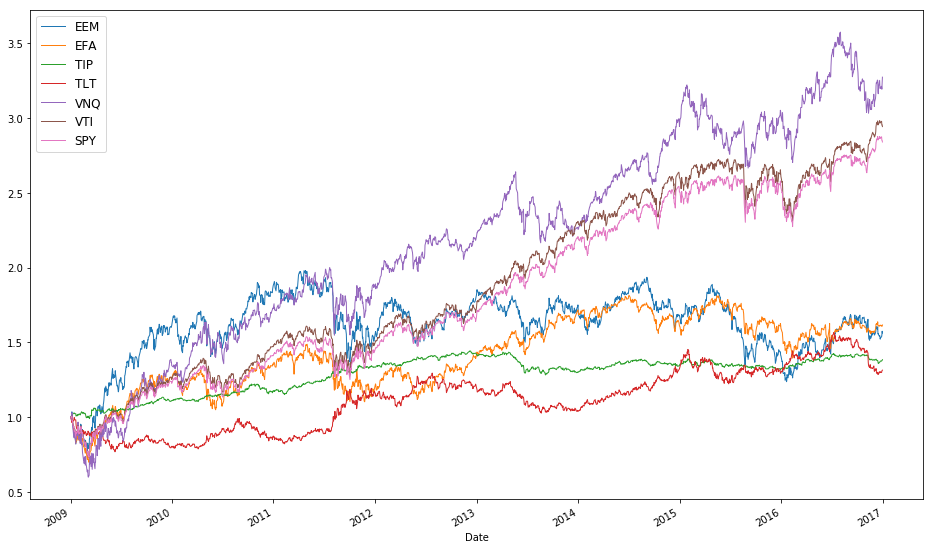

In [ ]:
# plot normalized prices of the train set
ax1 = (train / train.iloc[0,:]).plot()
(train_b / train_b.iloc[0,:]).plot(ax=ax1)

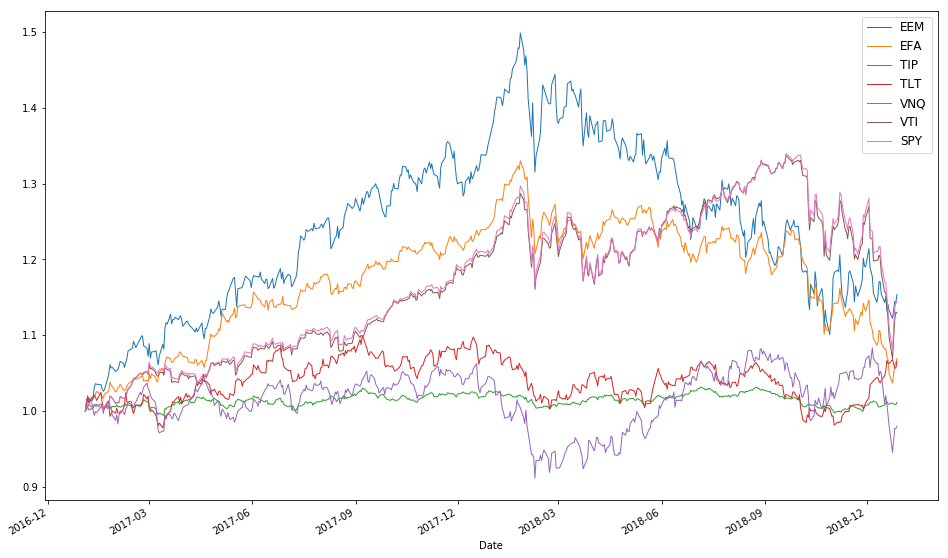

In [ ]:
# plot normalized prices of the test set
ax2 = (test / test.iloc[0,:]).plot()
(test_b / test_b.iloc[0,:]).plot(ax=ax2)

# Comparing the Algorithms

We want to train on market data from a number of years, and test out of sample for a duration smaller than the train set. To get started we accept the default parameters for the respective algorithms and we essentially are just looking at two independent time periods.  In the future we will want to optimize the paramaters on the train set.

In [ ]:
#list all the algos
olps_algos = [
algos.Anticor(),
algos.BAH(),
algos.BCRP(),
algos.BNN(),
algos.CORN(),
algos.CRP(b=swensen_allocation), # Non Uniform CRP (the Swensen allocation)
algos.CWMR(),
algos.EG(),
algos.Kelly(),
algos.OLMAR(),
algos.ONS(),
algos.PAMR(),
algos.RMR(),
algos.UP()
]

In [ ]:
# put all the algos in a dataframe
algo_names = [a.__class__.__name__ for a in olps_algos]
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos

At this point we could train all the algos to find the best parameters for each.

In [ ]:
train

EEM        EFA         TIP         TLT        VNQ  \
Date                                                                  
2009-01-02  21.330788  33.027435   77.610474   85.122978  22.736694   
2009-01-05  21.608025  32.496849   77.323578   82.928146  22.317913   
2009-01-06  22.097258  32.845730   77.897408   82.094093  23.432512   
2009-01-07  20.825243  32.278797   77.993065   82.416008  22.646496   
2009-01-08  20.735552  32.758511   78.614716   82.350166  22.478977   
2009-01-09  20.287081  31.624647   79.308105   82.474548  21.325714   
2009-01-12  19.430914  30.861458   79.706589   83.330505  20.075809   
2009-01-13  19.487993  30.294529   79.690666   83.418327  20.681433   
2009-01-14  18.542126  29.051638   79.786270   84.793770  19.599043   
2009-01-15  18.754133  29.313303   79.786270   84.932770  20.243320   
2009-01-16  18.957983  29.487745   79.459511   83.623238  21.010023   
2009-01-20  17.547348  27.329037   79.411690   83.608536  18.658382   
2009-01-21  18.501362  28.666414   78.200333   80.967415  20.610569   
2009-01-22  17.889811  27.997730   78.335762   79.409058  19.483070   
2009-01-23  18.118124  27.801483   78.622681   78.787224  20.075809   
2009-01-26  18.330126  28.346605   78.359650   78.099548  19.959837   
2009-01-27  18.656284  28.899008   79.037109   79.935883  20.243320   
2009-01-28  19.602150  29.749403   79.084961   77.938583  21.995764   
2009-01-29  18.607363  28.397493   78.694435   76.146118  20.198217   
2009-01-30  18.468746  28.128561   79.060989   75.904678  19.367104   
2009-02-02  18.281206  27.852362   79.347931   77.316887  19.837431   
2009-02-03  18.827518  28.651882   79.060989   75.475517  19.637699   
2009-02-04  18.966135  28.506512   78.901619   75.211411  19.160931   
2009-02-05  19.365683  28.913548   78.813957   75.277420  18.755032   
2009-02-06  20.336008  29.582233   79.268242   75.042679  20.056482   
2009-02-09  20.229998  29.574966   80.097092   75.284737  20.352852   
2009-02-10  19.006905  28.106758   80.463707   76.920731  18.542419   
2009-02-11  19.577688  28.412022   80.248535   77.918488  18.896774   
2009-02-12  19.455378  28.324802   79.961578   77.184814  18.574635   
2009-02-13  19.553223  28.019537   79.626923   75.130730  17.434258   
...               ...        ...         ...         ...        ...   
2016-11-17  32.724472  52.001774  107.530533  113.326012  69.474304   
2016-11-18  32.573799  51.434353  107.369446  112.998749  69.677376   
2016-11-21  32.893982  51.873650  107.625267  113.279251  69.465477   
2016-11-22  33.393085  52.001774  107.720039  113.241859  70.683861   
2016-11-23  33.035240  51.818737  107.359978  112.802383  70.383675   
2016-11-25  33.195335  51.974319  107.179955  112.970741  70.789825   
2016-11-28  33.327171  51.699760  107.341042  113.802864  71.116478   
2016-11-29  33.374256  52.029236  107.445274  114.279739  71.796295   
2016-11-30  33.430752  51.974319  107.502121  112.428398  70.975220   
2016-12-01  33.035240  51.772976  107.192291  111.241302  69.933388   
2016-12-02  33.072906  51.901108  107.249252  112.056412  70.630882   
2016-12-05  33.346001  52.413616  107.401184  111.934631  71.151787   
2016-12-06  33.524925  52.770546  107.610092  111.850296  71.610893   
2016-12-07  34.089958  53.557621  107.705040  112.805954  73.041153   
2016-12-08  34.240635  53.511864  107.600578  111.475548  73.544418   
2016-12-09  34.061703  53.740658  107.106827  110.088882  73.464958   
2016-12-12  33.835693  53.502705  107.087852  110.294998  73.950523   
2016-12-13  34.212379  54.079285  107.049866  110.688507  73.915222   
2016-12-14  33.195335  53.283062  106.204796  109.451782  72.299561   
2016-12-15  33.251831  53.164082  105.540115  110.004547  71.875763   
2016-12-16  33.101162  53.200687  105.483139  109.751602  72.952873   
2016-12-19  32.875149  53.118320  105.919914  110.932121  73.738655   
2016-12-20  32.988152  53.301361  106.024368  110.379318  73.906387   
2016-12-21  32.851200  53.316315  106.2902

In [ ]:
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    olps_train.loc[name,'results'] = alg.run(train)

2019-07-01 19:55:47,407 Running Anticor...
/usr/local/lib/python3.6/dist-packages/universal/algos/anticor.py:43: UserWarning: scipy.weave is not available in python3, falling back to python version
  warnings.warn('scipy.weave is not available in python3, falling back to python version')
2019-07-01 19:55:47,674 Anticor finished successfully.
2019-07-01 19:55:47,684 Running BAH...
2019-07-01 19:55:47,693 BAH finished successfully.
2019-07-01 19:55:47,702 Running BCRP...
2019-07-01 19:55:47,730 BCRP finished successfully.
2019-07-01 19:55:47,742 Running BNN...
2019-07-01 19:55:52,291 Progress: 10.0%...
2019-07-01 19:55:57,143 Progress: 20.0%...
2019-07-01 19:56:01,929 Progress: 30.0%...
2019-07-01 19:56:06,703 Progress: 40.0%...
2019-07-01 19:56:11,492 Progress: 50.0%...
2019-07-01 19:56:16,343 Progress: 60.0%...
2019-07-01 19:56:21,175 Progress: 70.0%...
2019-07-01 19:56:26,110 Progress: 80.0%...
2019-07-01 19:56:31,501 Progress: 90.0%...
2019-07-01 19:56:37,105 BNN finished successfull

10000
5


2019-07-01 20:00:08,764 Progress: 20.0%...
2019-07-01 20:00:08,939 Progress: 30.0%...
2019-07-01 20:00:09,116 Progress: 40.0%...
2019-07-01 20:00:09,293 Progress: 50.0%...
2019-07-01 20:00:09,471 Progress: 60.0%...
2019-07-01 20:00:09,645 Progress: 70.0%...
2019-07-01 20:00:09,822 Progress: 80.0%...
2019-07-01 20:00:09,999 Progress: 90.0%...
2019-07-01 20:00:10,175 UP finished successfully.


In [ ]:
# Let's make sure the fees are set to 0 at first
for k, r in olps_train.results.iteritems():
    r.fee = 0.0

2019-07-01 20:14:20,582 Running CRP...
2019-07-01 20:14:20,590 CRP finished successfully.


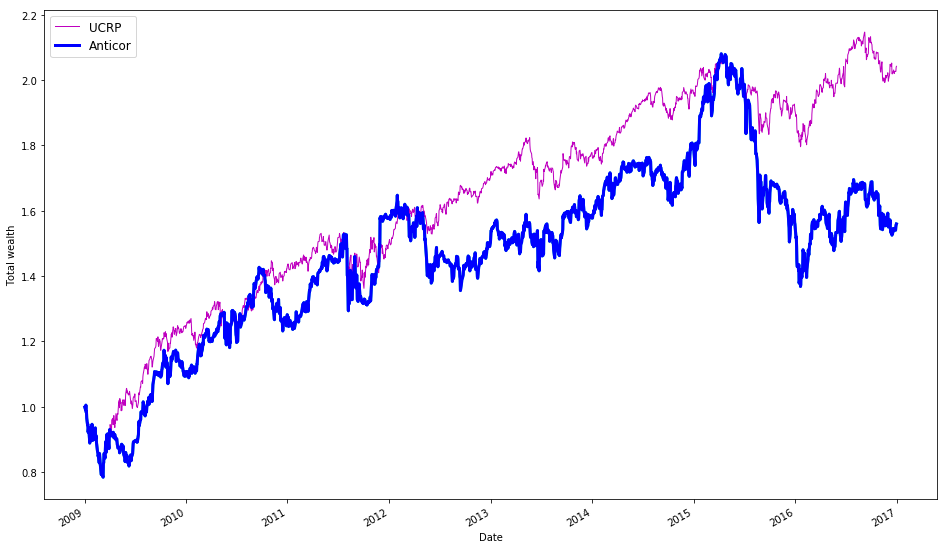

In [ ]:

# plot as if we had no fees
# get the first result so we can grab the figure axes from the plot
ax = olps_train.results[0].plot(assets=False, weights=False, ucrp=True, portfolio_label=olps_train.index[0])
g = -2
for k, r in olps_train.results.iteritems():
    g = g+1
    if k == olps_train.results.keys()[0]: # skip the first item because we have it already
        continue
    r.r.name = k
    if g==0:
      ("done")
      df_ret = r.r
    else:
      df_ret = pd.concat((df_ret,r.r),axis=1)


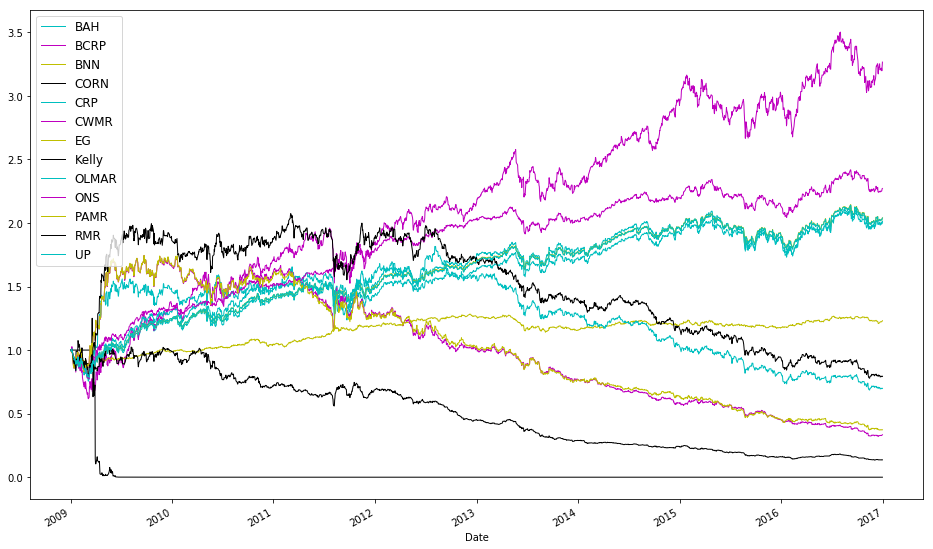

In [ ]:
df_ret.cumprod().plot()

In [ ]:
def olps_stats(df):
    for name, r in df.results.iteritems():
        df.ix[name,'profit'] = r.profit_factor
        df.ix[name,'sharpe'] = r.sharpe
        df.ix[name,'information'] = r.information
        df.ix[name,'annualized_return'] = r.annualized_return * 100
        df.ix[name,'drawdown_period'] = r.drawdown_period
        df.ix[name,'winning_pct'] = r.winning_pct * 100
    return df

olps_stats(olps_train)
olps_train[metrics].sort_values('profit', ascending=False)

profit    sharpe information annualized_return drawdown_period  \
ONS       1.17851  0.790586    0.198404           10.8012         304.198   
EG        1.12918  0.657903    -1.98673           9.32438         302.196   
UP        1.12771   0.65198   -0.629896           9.31716         302.196   
BAH       1.11723  0.610897   -0.192996           9.14517         299.194   
BCRP      1.11714  0.547131    0.353286           15.9486           308.2   
CRP       1.10742  0.556682   -0.139151           9.11706         324.211   
BNN       1.07627  0.400768   -0.466167           2.63345         1022.66   
Anticor    1.0547  0.295133   -0.238001           5.71459         509.331   
RMR      0.976301 -0.121445    -0.68857          -2.86312         1467.95   
OLMAR    0.963597 -0.188485   -0.767336          -4.39705         1108.72   
PAMR     0.901213 -0.529148    -1.20583          -11.6081         1832.19   
CWMR     0.890472 -0.587072    -1.29353          -12.8104         1832.19   
Kelly    0.801771  -1.10308    -1.15231          -92.4999         1961.27   
CORN     0.787547  -1.20588    -2.19653          -22.0315          1997.3   

        winning_pct  
ONS          54.568  
EG          54.2701  
UP          54.2205  
BAH          54.717  
BCRP        54.0218  
CRP         53.6246  
BNN         52.2853  
Anticor     52.8386  
RMR         50.6979  
OLMAR       50.1746  
PAMR        46.2761  
CWMR        46.2494  
Kelly       53.8187  
CORN        45.7753

In [ ]:
# Let's add fees of 0.1% per transaction (we pay $1 for every $1000 of stocks bought or sold).
for k, r in olps_train.results.iteritems():
    r.fee = 0.001

2019-07-01 20:16:14,622 Running CRP...
2019-07-01 20:16:14,630 CRP finished successfully.


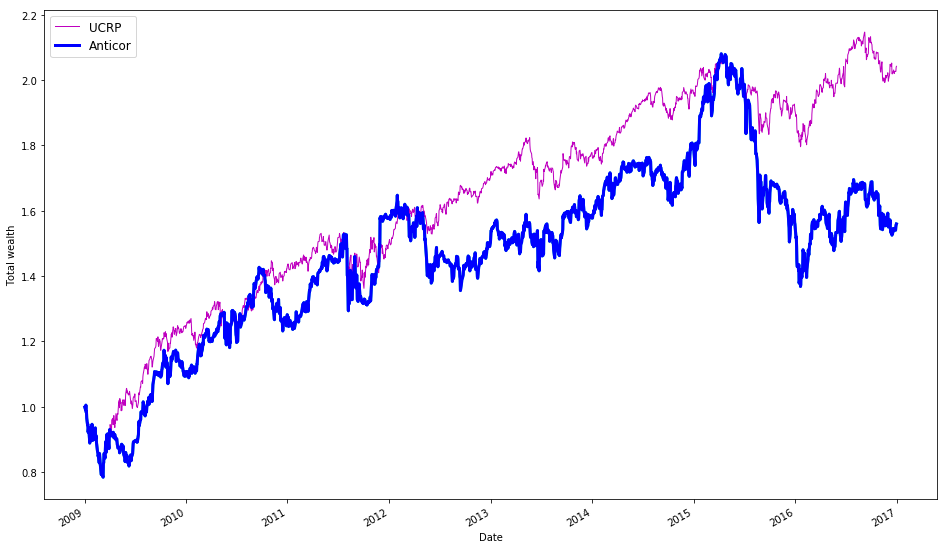

In [ ]:

# plot as if we had no fees
# get the first result so we can grab the figure axes from the plot
ax = olps_train.results[0].plot(assets=False, weights=False, ucrp=True, portfolio_label=olps_train.index[0])
g = -2
for k, r in olps_train.results.iteritems():
    g = g+1
    if k == olps_train.results.keys()[0]: # skip the first item because we have it already
        continue
    r.r.name = k
    if g==0:
      ("done")
      df_ret = r.r
    else:
      df_ret = pd.concat((df_ret,r.r),axis=1)


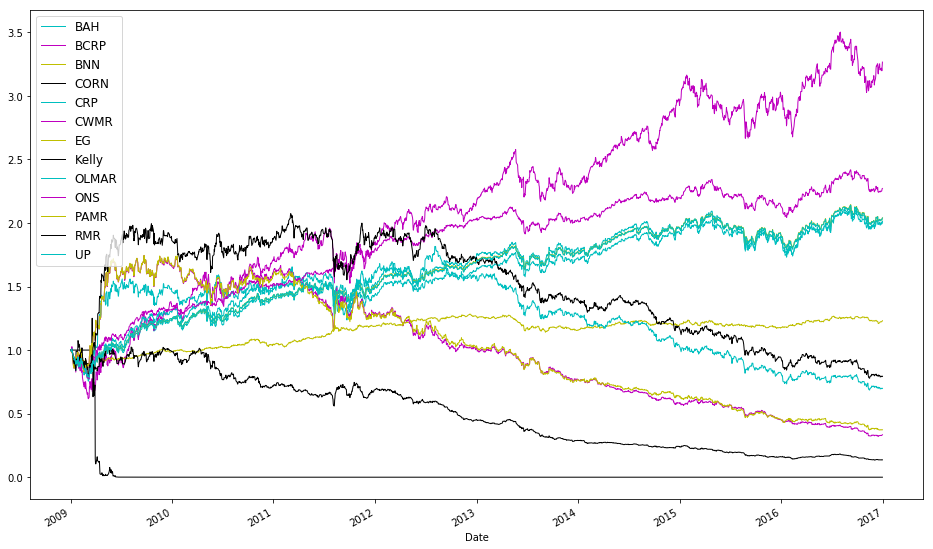

In [ ]:
df_ret.cumprod().plot()

In [ ]:
def olps_stats(df):
    for name, r in df.results.iteritems():
        df.ix[name,'profit'] = r.profit_factor
        df.ix[name,'sharpe'] = r.sharpe
        df.ix[name,'information'] = r.information
        df.ix[name,'annualized_return'] = r.annualized_return * 100
        df.ix[name,'drawdown_period'] = r.drawdown_period
        df.ix[name,'winning_pct'] = r.winning_pct * 100
    return df

olps_stats(olps_train)
olps_train[metrics].sort_values('profit', ascending=False)

profit    sharpe information annualized_return drawdown_period  \
ONS       1.17851  0.790586    0.198404           10.8012         304.198   
EG        1.12918  0.657903    -1.98673           9.32438         302.196   
UP        1.12771   0.65198   -0.629896           9.31716         302.196   
BAH       1.11723  0.610897   -0.192996           9.14517         299.194   
BCRP      1.11714  0.547131    0.353286           15.9486           308.2   
CRP       1.10742  0.556682   -0.139151           9.11706         324.211   
BNN       1.07627  0.400768   -0.466167           2.63345         1022.66   
Anticor    1.0547  0.295133   -0.238001           5.71459         509.331   
RMR      0.976301 -0.121445    -0.68857          -2.86312         1467.95   
OLMAR    0.963597 -0.188485   -0.767336          -4.39705         1108.72   
PAMR     0.901213 -0.529148    -1.20583          -11.6081         1832.19   
CWMR     0.890472 -0.587072    -1.29353          -12.8104         1832.19   
Kelly    0.801771  -1.10308    -1.15231          -92.4999         1961.27   
CORN     0.787547  -1.20588    -2.19653          -22.0315          1997.3   

        winning_pct  
ONS          54.568  
EG          54.2701  
UP          54.2205  
BAH          54.717  
BCRP        54.0218  
CRP         53.6246  
BNN         52.2853  
Anticor     52.8386  
RMR         50.6979  
OLMAR       50.1746  
PAMR        46.2761  
CWMR        46.2494  
Kelly       53.8187  
CORN        45.7753

### Notice how Kelly crashes right away and how RMR and OLMAR float to the top after some high volatility.  

# Run on the Test Set

In [ ]:
# create the test set dataframe
olps_test  = pd.DataFrame(index=algo_names, columns=algo_data)
olps_test.algo  = olps_algos

In [ ]:
# run all algos
for name, alg in zip(olps_test.index, olps_test.algo):
    olps_test.loc[name,'results'] = alg.run(test)

2019-07-01 20:18:09,496 Running Anticor...
2019-07-01 20:18:09,624 Anticor finished successfully.
2019-07-01 20:18:09,635 Running BAH...
2019-07-01 20:18:09,643 BAH finished successfully.
2019-07-01 20:18:09,651 Running BCRP...
2019-07-01 20:18:09,681 BCRP finished successfully.
2019-07-01 20:18:09,690 Running BNN...
2019-07-01 20:18:10,895 Progress: 10.0%...
2019-07-01 20:18:12,395 Progress: 20.0%...
2019-07-01 20:18:13,857 Progress: 30.0%...
2019-07-01 20:18:15,320 Progress: 40.0%...
2019-07-01 20:18:16,853 Progress: 50.0%...
2019-07-01 20:18:18,317 Progress: 60.0%...
2019-07-01 20:18:19,782 Progress: 70.0%...
2019-07-01 20:18:21,247 Progress: 80.0%...
2019-07-01 20:18:22,732 Progress: 90.0%...
2019-07-01 20:18:24,164 BNN finished successfully.
2019-07-01 20:18:24,172 Running CORN...
2019-07-01 20:18:24,183 Progress: 0.0%...
2019-07-01 20:18:25,492 Progress: 10.0%...
2019-07-01 20:18:27,055 Progress: 20.0%...
2019-07-01 20:18:28,752 Progress: 30.0%...
2019-07-01 20:18:30,589 Progress

10000
5


2019-07-01 20:18:52,767 Progress: 40.0%...
2019-07-01 20:18:52,815 Progress: 50.0%...
2019-07-01 20:18:52,863 Progress: 60.0%...
2019-07-01 20:18:52,912 Progress: 70.0%...
2019-07-01 20:18:52,960 Progress: 80.0%...
2019-07-01 20:18:53,012 Progress: 90.0%...
2019-07-01 20:18:53,059 UP finished successfully.


In [ ]:
# Let's make sure the fees are 0 at first
for k, r in olps_test.results.iteritems():
    r.fee = 0.0

/usr/local/lib/python3.6/dist-packages/universal/result.py:101: RuntimeWarning: divide by zero encountered in log
  self.r_log = np.log(self.r)


2019-07-01 20:19:09,282 Running CRP...
2019-07-01 20:19:09,288 CRP finished successfully.


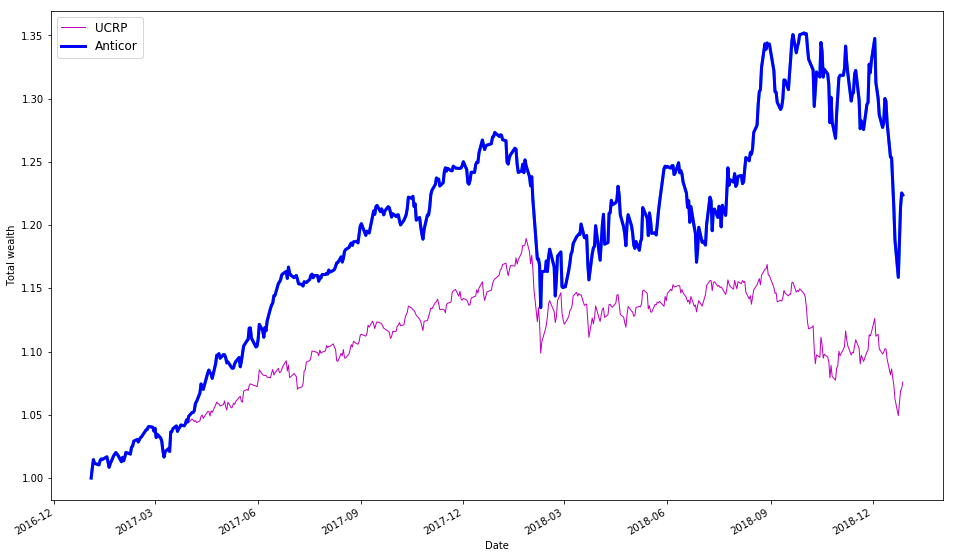

In [ ]:

# plot as if we had no fees
# get the first result so we can grab the figure axes from the plot
ax = olps_test.results[0].plot(assets=False, weights=False, ucrp=True, portfolio_label=olps_test.index[0])
g = -2
for k, r in olps_test.results.iteritems():
    g = g+1
    if k == olps_test.results.keys()[0]: # skip the first item because we have it already
        continue
    r.r.name = k
    if g==0:
      ("done")
      df_ret = r.r
    else:
      df_ret = pd.concat((df_ret,r.r),axis=1)


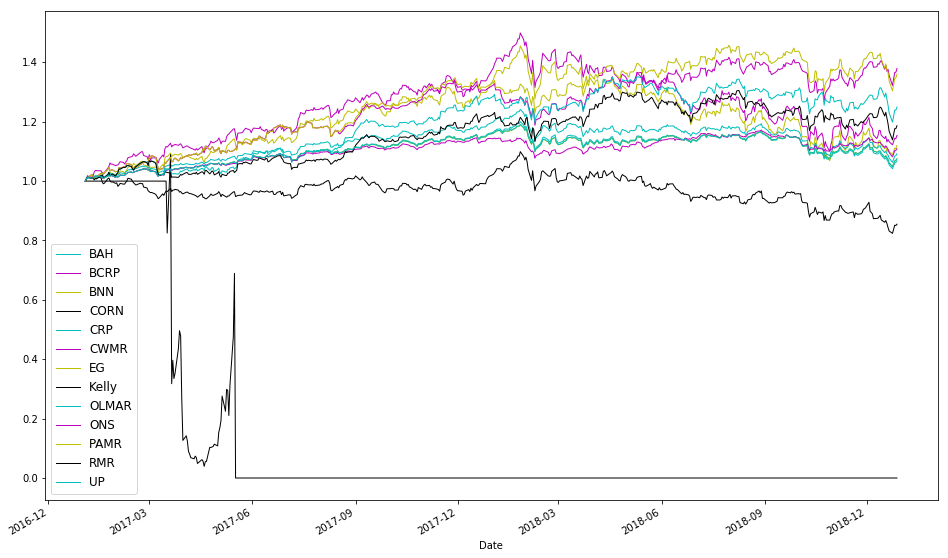

In [ ]:
df_ret.cumprod().plot()

In [ ]:
## Mean reverting strategies seems to have performed the best. Look more into mean reverting and olmar, refer to universal repository.
def olps_stats(df):
    for name, r in df.results.iteritems():
        df.ix[name,'profit'] = r.profit_factor
        df.ix[name,'sharpe'] = r.sharpe
        df.ix[name,'information'] = r.information
        df.ix[name,'annualized_return'] = r.annualized_return * 100
        df.ix[name,'drawdown_period'] = r.drawdown_period
        df.ix[name,'winning_pct'] = r.winning_pct * 100
    return df

olps_stats(olps_test)
olps_test[metrics].sort_values('profit', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


profit    sharpe information annualized_return drawdown_period  \
CWMR      1.22796    1.1747     1.29114           17.6079         103.763   
PAMR      1.21775   1.12288     1.22529           16.7799         103.763   
Anticor   1.16043  0.807136    0.770605           10.7208         158.637   
OLMAR     1.15685  0.819944    0.780832           11.8837         159.635   
ONS       1.14657  0.810009    0.538062           5.34925         131.699   
RMR       1.11873  0.631758    0.510629           9.00811         96.7788   
EG        1.08465  0.474468   -0.564386           3.73628         231.471   
CRP       1.08453  0.479646    0.369676           4.53629         231.471   
UP        1.08372  0.469189   -0.507125           3.70662         231.471   
BAH       1.07322  0.410858     -0.5615           3.38644         231.471   
BCRP      1.07063  0.414406    0.304802           7.48759         231.471   
BNN         1.056  0.329481    0.176123            5.8857         231.471   
CORN     0.908872 -0.540485    -1.23373          -7.59587         231.471   
Kelly           0       NaN           0              -100         446.978   

        winning_pct  
CWMR        57.6923  
PAMR        57.2874  
Anticor     57.1717  
OLMAR       54.4534  
ONS            55.4  
RMR         53.6437  
EG             55.2  
CRP            54.6  
UP               55  
BAH              55  
BCRP        54.3434  
BNN         54.3434  
CORN        51.8293  
Kelly       52.6667

### Kelly went wild and crashed, so let's remove it from the mix

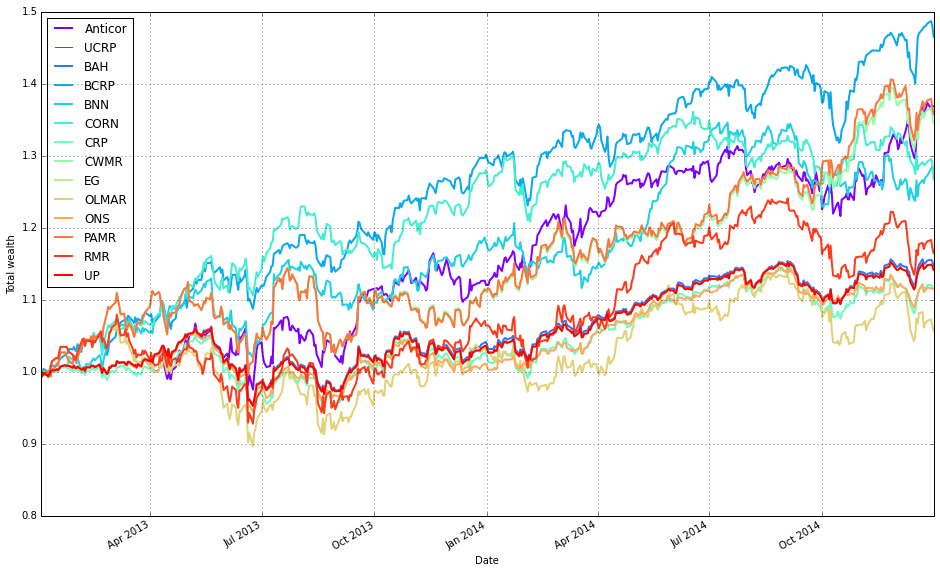

In [ ]:
# plot as if we had no fees
# get the first result so we can grab the figure axes from the plot
ax = olps_test.results[0].plot(assets=False, weights=False, ucrp=True, portfolio_label=olps_test.index[0])
for k, r in olps_test.results.iteritems():
    if k == olps_test.results.keys()[0] or k == 'Kelly': # skip the first item because we have it already
        continue
    r.plot(assets=False, weights=False, ucrp=False, portfolio_label=k, ax=ax[0])

In [ ]:
olps_stats(olps_test)
olps_test[metrics].sort('profit', ascending=False)

profit     sharpe information annualized_return drawdown_period  \
BCRP     1.323158   1.687346     1.75396          21.09194              36   
Anticor  1.213151   1.119712   0.9792509          17.03448              86   
PAMR     1.198056   1.066684   0.8037021          16.56317             127   
CWMR     1.192981   1.038446   0.7643975          16.02498             127   
CORN     1.187963   1.042635    0.625535          12.58479             136   
BNN       1.18066  0.9848432   0.5932079          13.03065             122   
BAH      1.150074  0.8247777   0.5070828           7.09091             193   
UP        1.14739  0.8091129   0.3482341          6.841178             193   
EG         1.1467  0.8053731    0.491308          6.826939             194   
ONS      1.121838  0.6733858  -0.5299079          5.597352             229   
CRP        1.0989  0.5622322  -0.6019041          5.547421             224   
RMR      1.094977  0.5463773   0.1040624          7.934969             247   
OLMAR    1.032958  0.1938946    -0.38272          2.766207             291   
Kelly           0        NaN           0              -100             443   

        winning_pct  
BCRP       59.04573  
Anticor    56.88623  
PAMR       53.90782  
CWMR       54.10822  
CORN        55.4672  
BNN            56.6  
BAH          55.666  
UP         55.86481  
EG         54.87078  
ONS        53.87674  
CRP        53.28032  
RMR        54.50902  
OLMAR      54.30862  
Kelly       58.0574

### Wow, ONS and OLMAR are at the bottom of the list. Remember, we really didn't do any training, but if we had selected ONS or OLMAR at the beginning of 2013 based on past performance, we would not have beat BAH. Hm.

# Focusing on OLMAR

Instead of using the default parameters, we will test several `window` parameters to see if we can get OLMAR to improve.

In [ ]:
# we need need fewer colors so let's reset the colors_cycle
mpl.rcParams['axes.color_cycle']= default_color_cycle

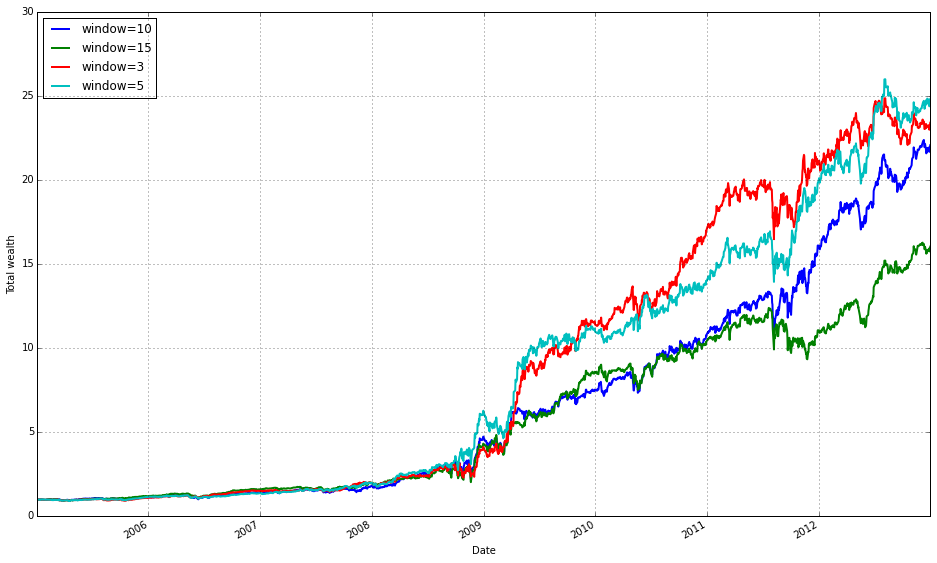

In [ ]:
train_olmar = algos.OLMAR.run_combination(train, window=[3,5,10,15], eps=10)
train_olmar.plot()

In [ ]:
print(train_olmar.summary())

Summary for window=3:
    Profit factor: 1.30
    Sharpe ratio: 1.24
    Information ratio (wrt UCRP): 1.34
    Annualized return: 48.33%
    Longest drawdown: 132 days
    Winning days: 55.0%
        
Summary for window=5:
    Profit factor: 1.30
    Sharpe ratio: 1.28
    Information ratio (wrt UCRP): 1.36
    Annualized return: 49.43%
    Longest drawdown: 128 days
    Winning days: 55.0%
        
Summary for window=10:
    Profit factor: 1.29
    Sharpe ratio: 1.18
    Information ratio (wrt UCRP): 1.31
    Annualized return: 47.25%
    Longest drawdown: 125 days
    Winning days: 55.5%
        
Summary for window=15:
    Profit factor: 1.26
    Sharpe ratio: 1.06
    Information ratio (wrt UCRP): 1.15
    Annualized return: 41.48%
    Longest drawdown: 169 days
    Winning days: 54.6%
        


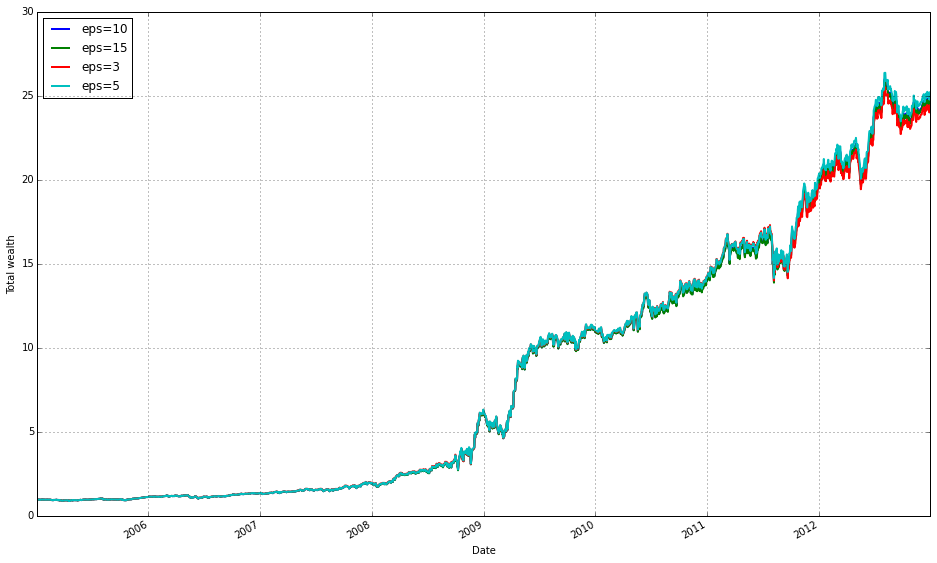

In [ ]:
train_olmar = algos.OLMAR.run_combination(train, window=5, eps=[3,5,10,15])
train_olmar.plot()

In [ ]:
print(train_olmar.summary())

Summary for eps=3:
    Profit factor: 1.30
    Sharpe ratio: 1.27
    Information ratio (wrt UCRP): 1.36
    Annualized return: 49.15%
    Longest drawdown: 128 days
    Winning days: 54.9%
        
Summary for eps=5:
    Profit factor: 1.31
    Sharpe ratio: 1.28
    Information ratio (wrt UCRP): 1.37
    Annualized return: 49.73%
    Longest drawdown: 128 days
    Winning days: 55.0%
        
Summary for eps=10:
    Profit factor: 1.30
    Sharpe ratio: 1.28
    Information ratio (wrt UCRP): 1.36
    Annualized return: 49.43%
    Longest drawdown: 128 days
    Winning days: 55.0%
        
Summary for eps=15:
    Profit factor: 1.30
    Sharpe ratio: 1.27
    Information ratio (wrt UCRP): 1.36
    Annualized return: 49.37%
    Longest drawdown: 128 days
    Winning days: 55.0%
        


### We find that a window of 5 and eps are 5 are optimal over the train time period, but the default of w=5 and eps=10 were also fine for our purposes.

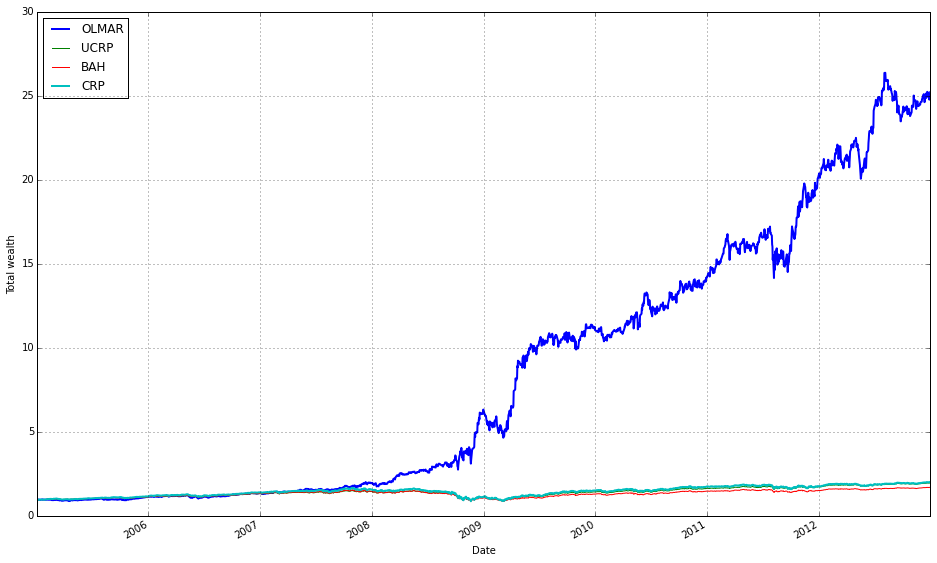

In [ ]:
# OLMAR vs UCRP
best_olmar = train_olmar[1]
ax1 = best_olmar.plot(ucrp=True, bah=True, weights=False, assets=False, portfolio_label='OLMAR')
olps_train.loc['CRP'].results.plot(ucrp=False, bah=False, weights=False, assets=False, ax=ax1[0], portfolio_label='CRP')

### On the train set OLMAR really delivers over CRP !

In [ ]:
# let's print the stats
print(best_olmar.summary())

Summary:
    Profit factor: 1.31
    Sharpe ratio: 1.28
    Information ratio (wrt UCRP): 1.37
    Annualized return: 49.73%
    Longest drawdown: 128 days
    Winning days: 55.0%
        


### Let's see how individual ETFs contribute to portfolio equity.

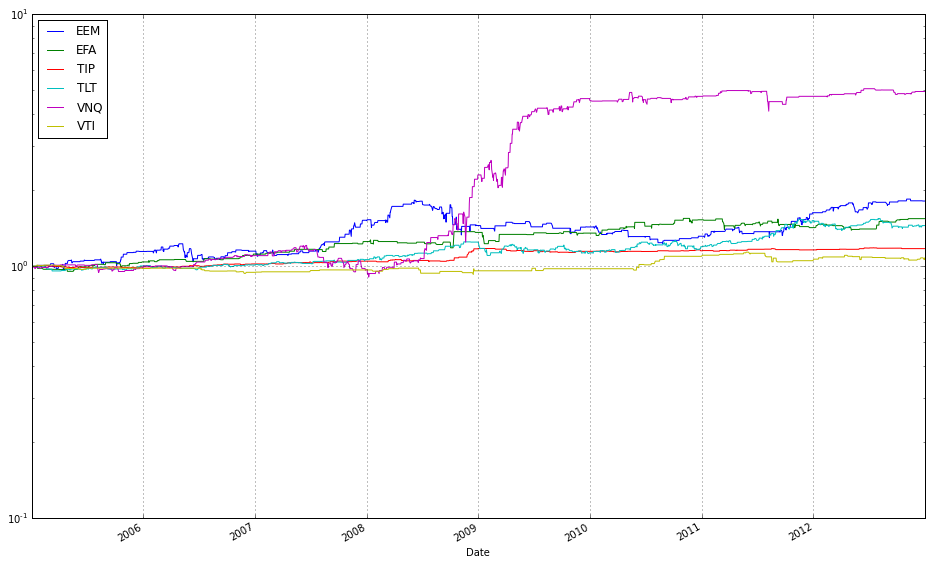

In [ ]:
best_olmar.plot_decomposition(legend=True, logy=True)

### Let's highlight the magnitude of the highest contributing ETF by removing the log scale and looking at it directly.

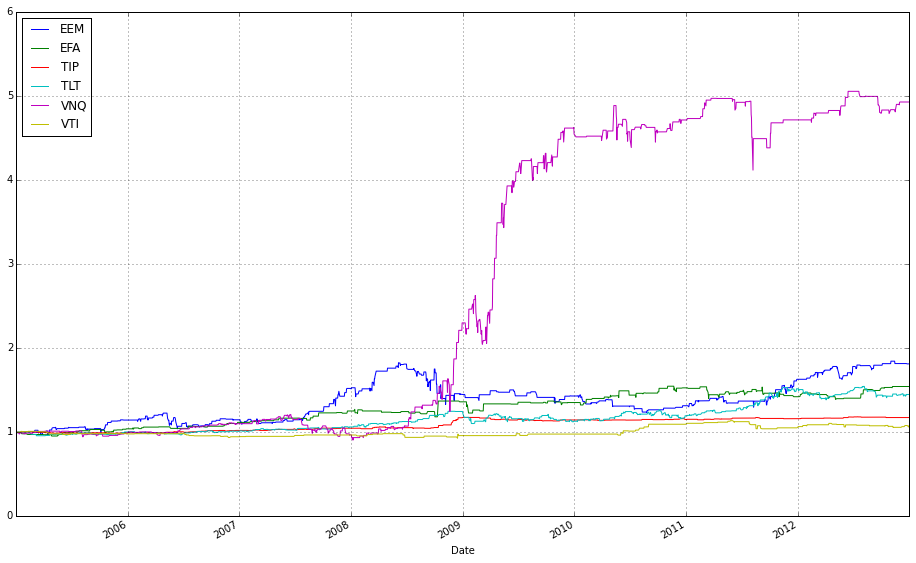

In [ ]:
best_olmar.plot_decomposition(legend=True, logy=False)

### So VNQ (Real Estate) is the big driver after the market crash of 2008, which makes sense.

### Let's look at portfolio allocations

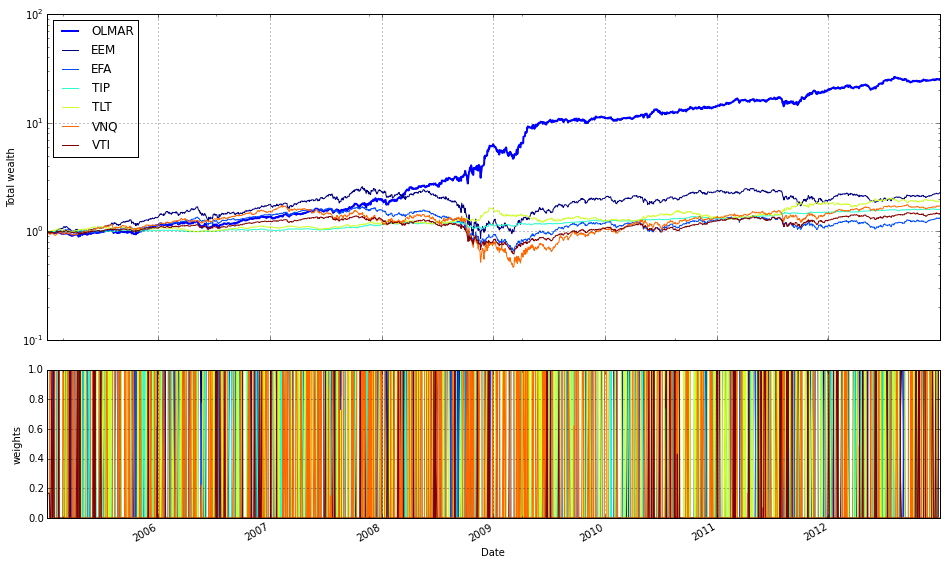

In [ ]:
best_olmar.plot(weights=True, assets=True, ucrp=False, logy=True, portfolio_label='OLMAR')

### VNQ is the big driver of wealth (log scale). Let's test the strategy by removing the most profitable stock and comparing Total Wealth.

Summary:
    Profit factor: 1.23
    Sharpe ratio: 1.02
    Information ratio (wrt UCRP): 0.99
    Annualized return: 32.37%
    Longest drawdown: 153 days
    Winning days: 54.7%
        


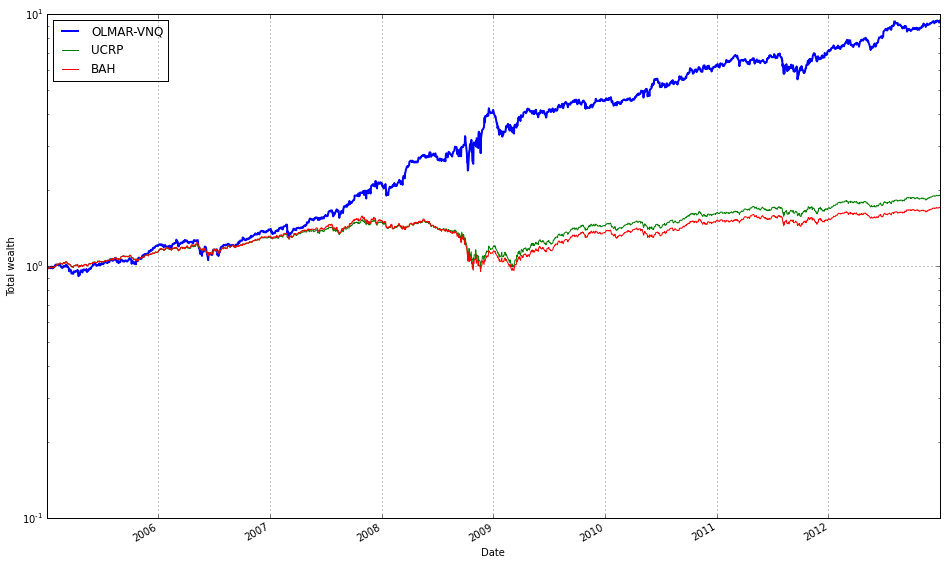

In [ ]:
# find the name of the most profitable asset
most_profitable = best_olmar.equity_decomposed.iloc[-1].argmax()

# rerun algorithm on data without it
result_without = algos.OLMAR().run(train.drop([most_profitable], 1))

# and print results
print(result_without.summary())
result_without.plot(weights=False, assets=False, bah=True, ucrp=True, logy=True, portfolio_label='OLMAR-VNQ')

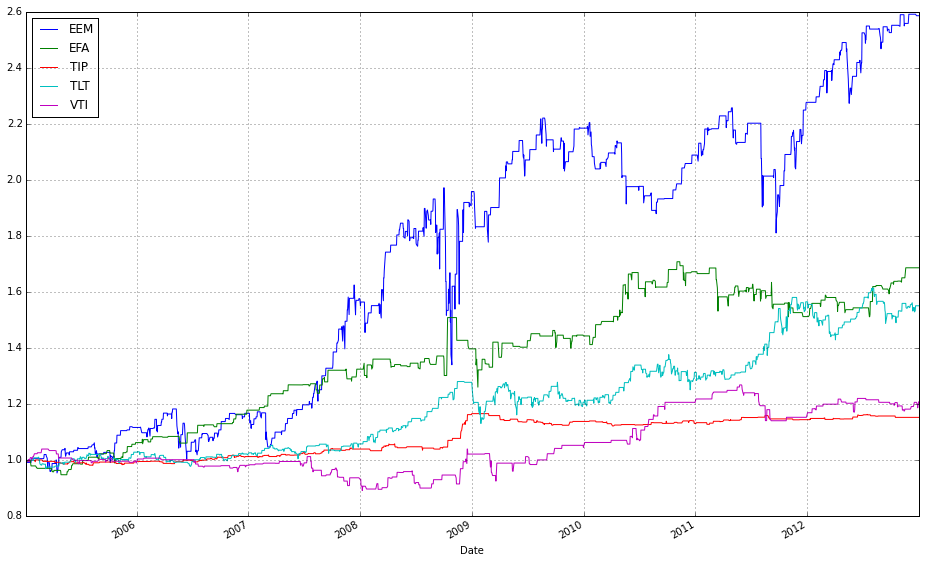

In [ ]:
result_without.plot_decomposition(legend=True, logy=False)

### Let's add fees of 0.1% per transaction (we pay \$1 for every \$1000 of stocks bought or sold).

Summary:
    Profit factor: 1.11
    Sharpe ratio: 0.48
    Information ratio (wrt UCRP): 0.28
    Annualized return: 15.97%
    Longest drawdown: 808 days
    Winning days: 51.1%
        


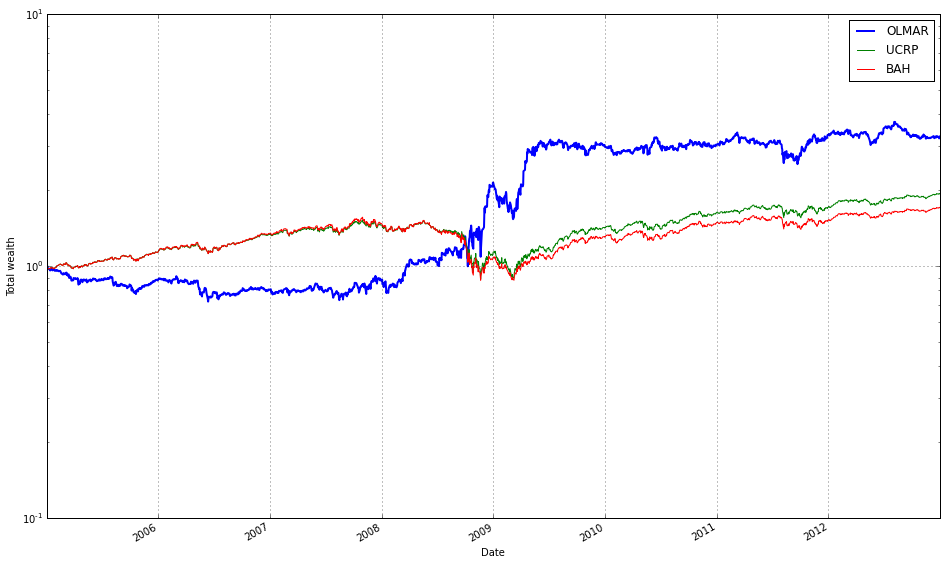

In [ ]:
best_olmar.fee = 0.001
print(best_olmar.summary())
best_olmar.plot(weights=False, assets=False, bah=True, ucrp=True, logy=True, portfolio_label='OLMAR')

### The results now fall, with a Sharpe Ratio below the ~0.5 market Sharpe, and an annualized return that has been cut in half due to fees. It's as if all the trading makes OLMAR underperform for the first 4 years until it can grab some volatility in 2008 to beat UCRP.

### Let's look at OLMAR in the test time frame

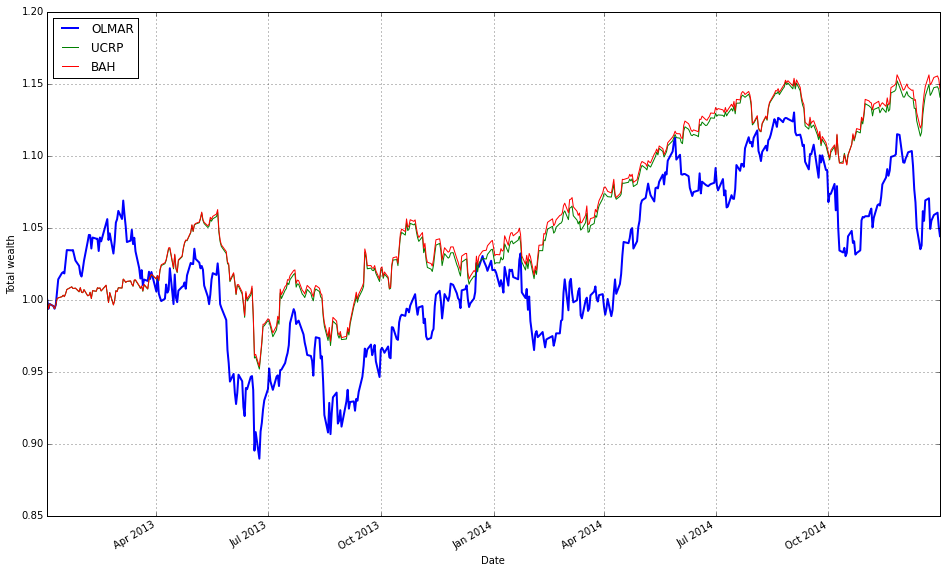

In [ ]:
test_olmar = algos.OLMAR(window=5, eps=5).run(test)
#print(train_olmar.summary())
test_olmar.plot(ucrp=True, bah=True, weights=False, assets=False, portfolio_label='OLMAR')

### With fees

Summary:
    Profit factor: 0.76
    Sharpe ratio: -1.62
    Information ratio (wrt UCRP): -3.05
    Annualized return: -19.52%
    Longest drawdown: 461 days
    Winning days: 49.1%
        


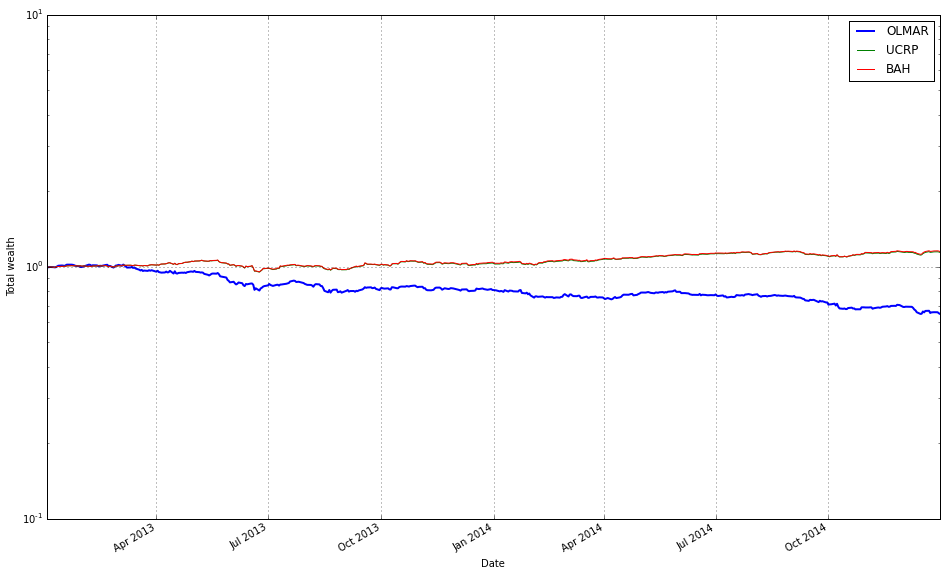

In [ ]:
test_olmar.fee = 0.001
print(test_olmar.summary())
test_olmar.plot(weights=False, assets=False, bah=True, ucrp=True, logy=True, portfolio_label='OLMAR')

# OLMAR Starting in 2010

The 2008-2009 recession was unique.  Let's try it all again starting in 2010, with a train set from 2010-2013 inclusive, and a test set of 2014.

In [ ]:
# set train and test time periods
train_start_2010= datetime(2010,1,1)
train_end_2010 = datetime(2013,12,31)
test_start_2010 = datetime(2014,1,1)
test_end_2010 = datetime(2014,12,31)

In [ ]:
# load data from Yahoo
train_2010 = DataReader(etfs, 'yahoo', start=train_start_2010, end=train_end_2010)['Adj Close']
test_2010  = DataReader(etfs, 'yahoo', start=test_start_2010,  end=test_end_2010)['Adj Close']

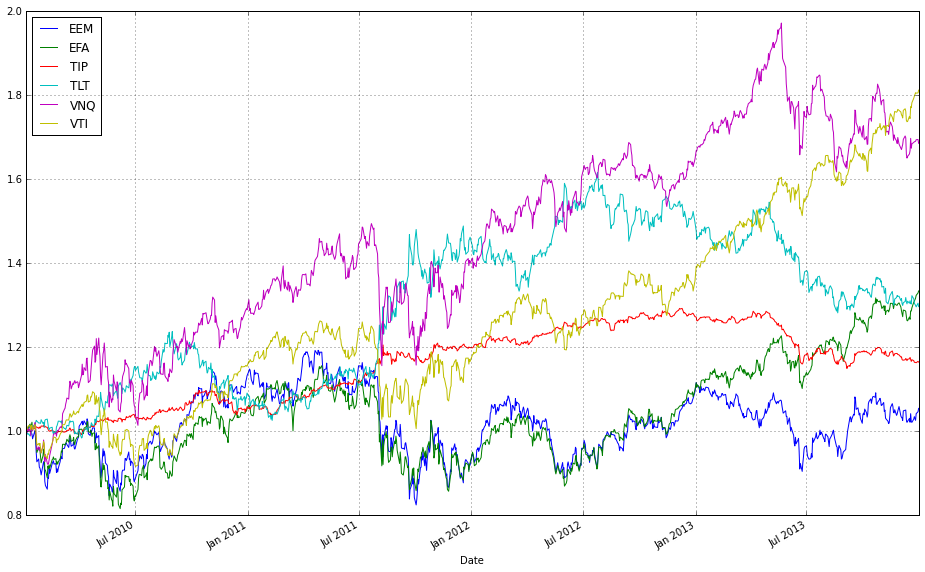

In [ ]:
# plot normalized prices of these stocks
(train_2010 / train_2010.iloc[0,:]).plot()

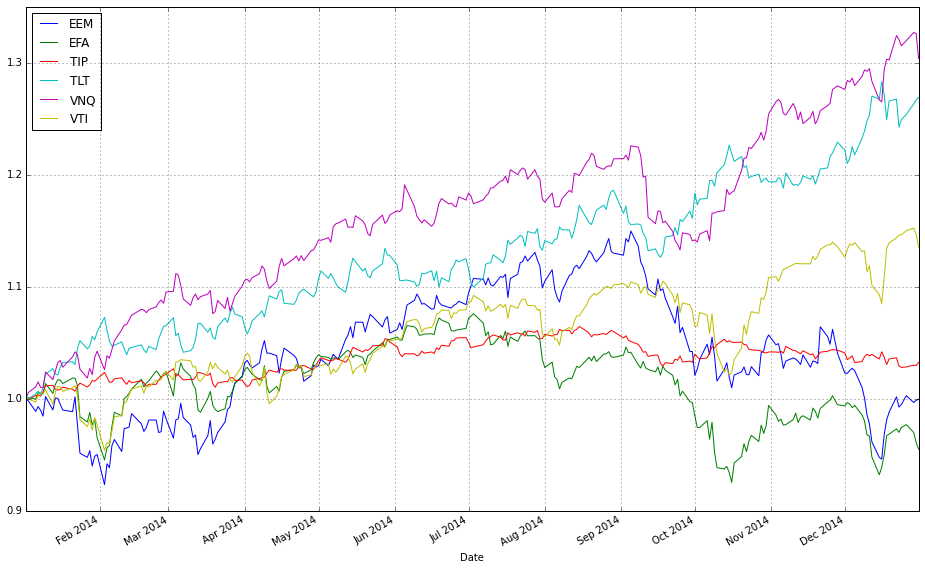

In [ ]:
# plot normalized prices of these stocks
(test_2010 / test_2010.iloc[0,:]).plot()

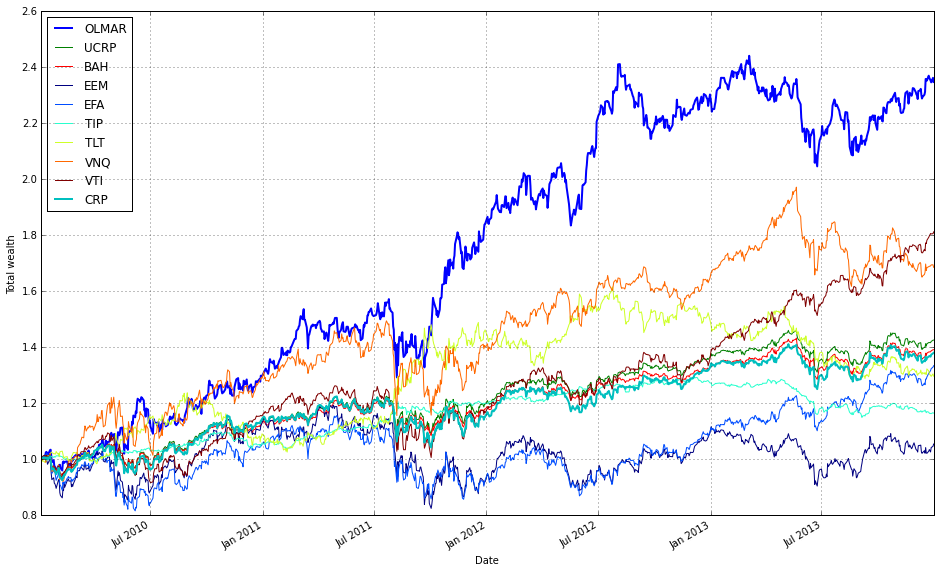

In [ ]:
train_olmar_2010 = algos.OLMAR().run(train_2010)
train_crp_2010 = algos.CRP(b=swensen_allocation).run(train_2010)
ax1 = train_olmar_2010.plot(assets=True, weights=False, ucrp=True, bah=True, portfolio_label='OLMAR')
train_crp_2010.plot(ucrp=False, bah=False, weights=False, assets=False, ax=ax1[0], portfolio_label='CRP')

In [ ]:
print(train_olmar_2010.summary())

Summary:
    Profit factor: 1.19
    Sharpe ratio: 1.00
    Information ratio (wrt UCRP): 0.75
    Annualized return: 23.83%
    Longest drawdown: 209 days
    Winning days: 55.1%
        


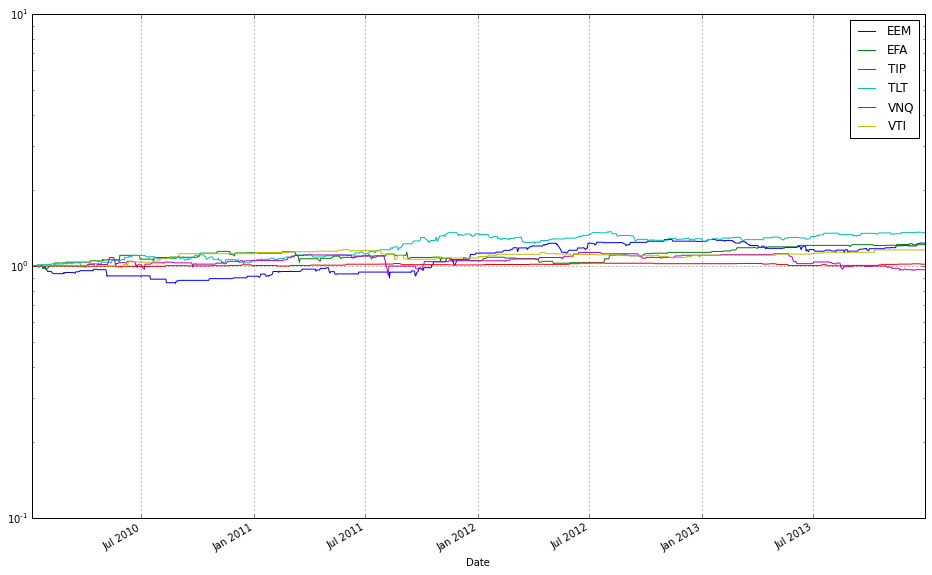

In [ ]:
train_olmar_2010.plot_decomposition(legend=True, logy=True)

Not bad, with a Sharpe at 1 and no one ETF dominating the portfolio.  Now let's see how it fairs in 2014.

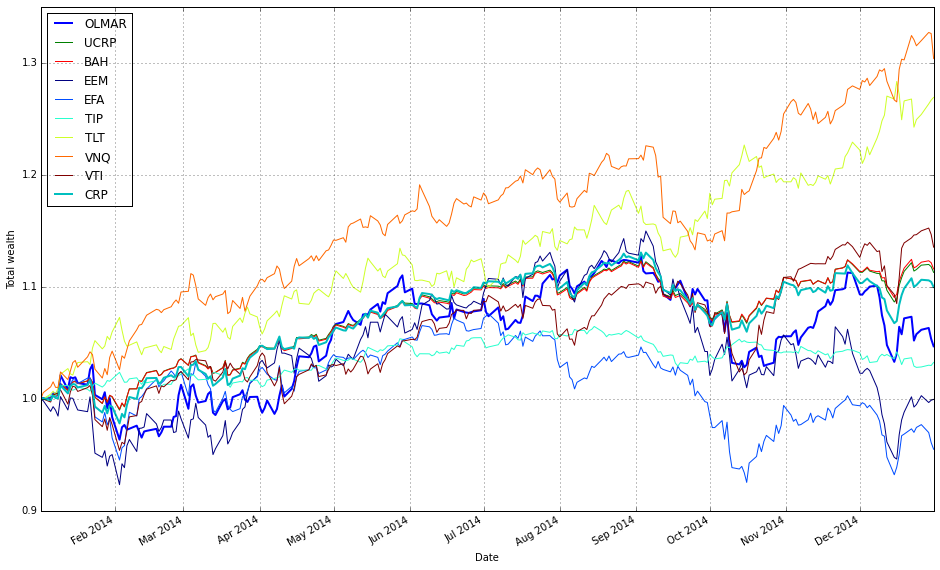

In [ ]:
test_olmar_2010 = algos.OLMAR().run(test_2010)
test_crp_2010 = algos.CRP(b=swensen_allocation).run(test_2010)
ax1 = test_olmar_2010.plot(assets=True, weights=False, ucrp=True, bah=True, portfolio_label='OLMAR')
test_crp_2010.plot(ucrp=False, bah=False, weights=False, assets=False, ax=ax1[0], portfolio_label='CRP')

In [ ]:
print(test_olmar_2010.summary())

Summary:
    Profit factor: 1.06
    Sharpe ratio: 0.36
    Information ratio (wrt UCRP): -0.63
    Annualized return: 4.72%
    Longest drawdown: 83 days
    Winning days: 57.9%
        


We just happen to be looking at a different time period and now the Sharpe drops below 0.5 and OLMAR fails to beat BAH.  Not good.

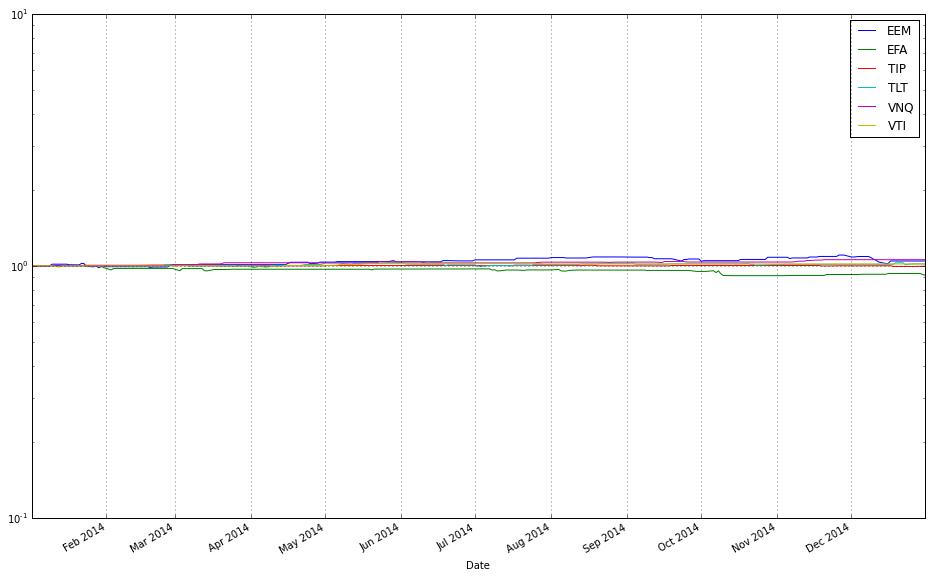

In [ ]:
test_olmar_2010.plot_decomposition(legend=True, logy=True)

# SPY / TLT portfolio comparison

Let's step back and simplify this by looking at OLMAR on a SPY and TLT portfolio.  We should also compare this portfolio to a rebalanced 70/30 mix of SPY and TLT.

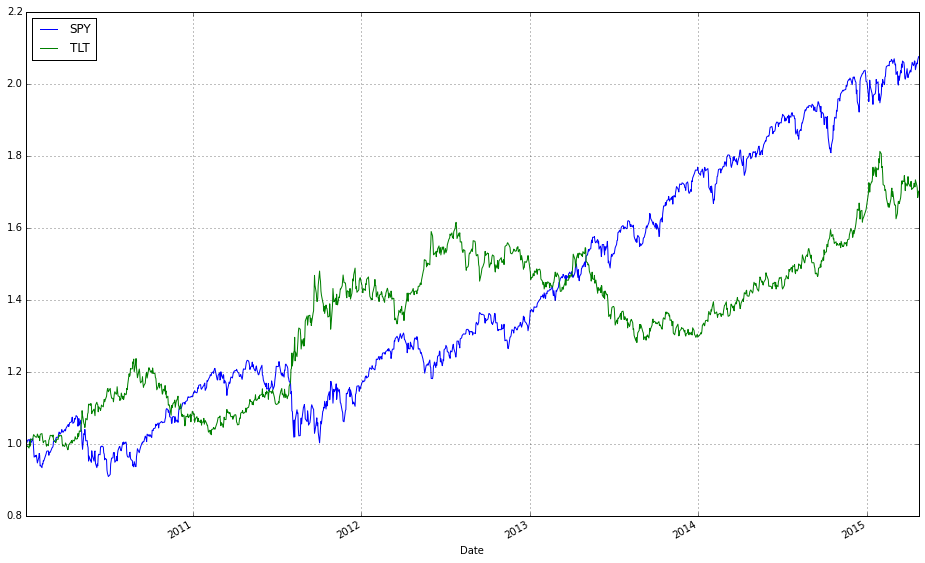

In [ ]:
# load data from Yahoo
spy_tlt_data = DataReader(['SPY', 'TLT'], 'yahoo', start=datetime(2010,1,1))['Adj Close']

# plot normalized prices of these stocks
(spy_tlt_data / spy_tlt_data.iloc[0,:]).plot()

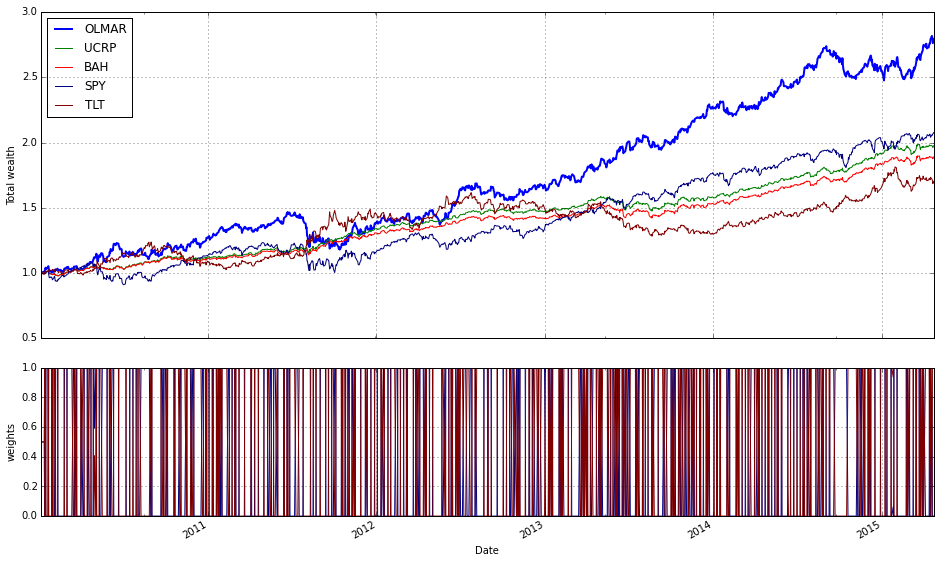

In [ ]:
spy_tlt_olmar_2010 = algos.OLMAR().run(spy_tlt_data)
spy_tlt_olmar_2010.plot(assets=True, weights=True, ucrp=True, bah=True, portfolio_label='OLMAR')

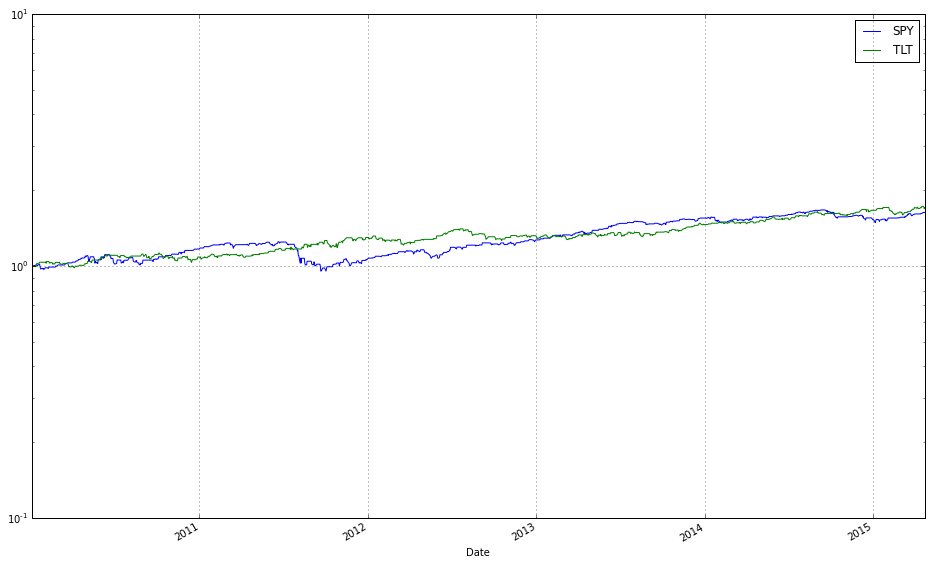

In [ ]:
spy_tlt_olmar_2010.plot_decomposition(legend=True, logy=True)

In [ ]:
print(spy_tlt_olmar_2010.summary())

Summary:
    Profit factor: 1.22
    Sharpe ratio: 1.18
    Information ratio (wrt UCRP): 0.48
    Annualized return: 21.35%
    Longest drawdown: 210 days
    Winning days: 56.2%
        


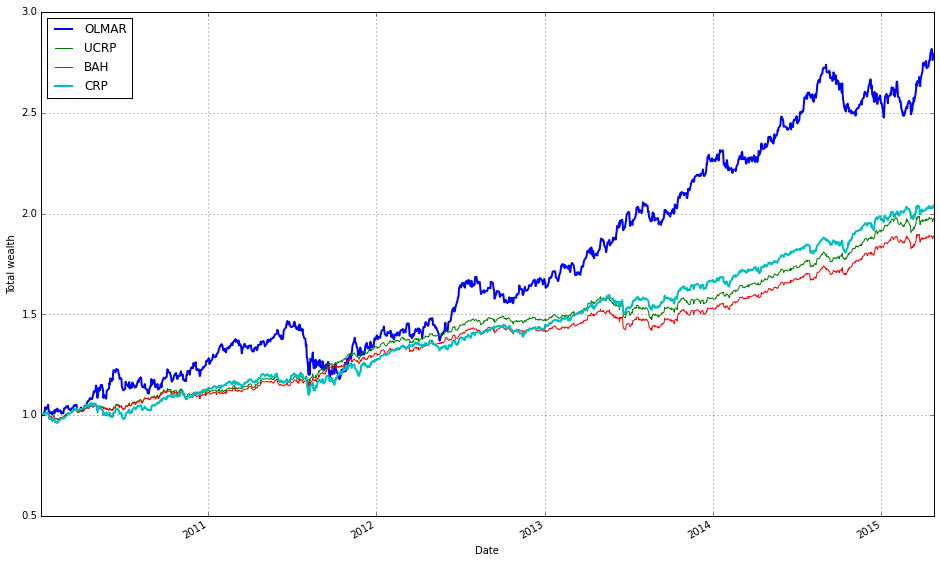

In [ ]:
spy_tlt_2010 = algos.CRP(b=[0.7, 0.3]).run(spy_tlt_data)

ax1 = spy_tlt_olmar_2010.plot(assets=False, weights=False, ucrp=True, bah=True, portfolio_label='OLMAR')
spy_tlt_2010.plot(assets=False, weights=False, ucrp=False, bah=False, portfolio_label='CRP', ax=ax1[0])

## Now OLMAR looks better!

# OLMAR Market Sectors comparison

Let's look at algo behavior on market sectors:

- XLY Consumer Discrectionary SPDR Fund  
- XLF Financial SPDR Fund  
- XLK Technology SPDR Fund  
- XLE Energy SPDR Fund  
- XLV Health Care SPRD Fund  
- XLI Industrial SPDR Fund  
- XLP Consumer Staples SPDR Fund  
- XLB Materials SPDR Fund  
- XLU Utilities SPRD Fund  

In [ ]:
sectors = ['XLY','XLF','XLK','XLE','XLV','XLI','XLP','XLB','XLU']
train_sectors = DataReader(sectors, 'yahoo', start=train_start_2010, end=train_end_2010)['Adj Close']
test_sectors  = DataReader(sectors, 'yahoo', start=test_start_2010,  end=test_end_2010)['Adj Close']

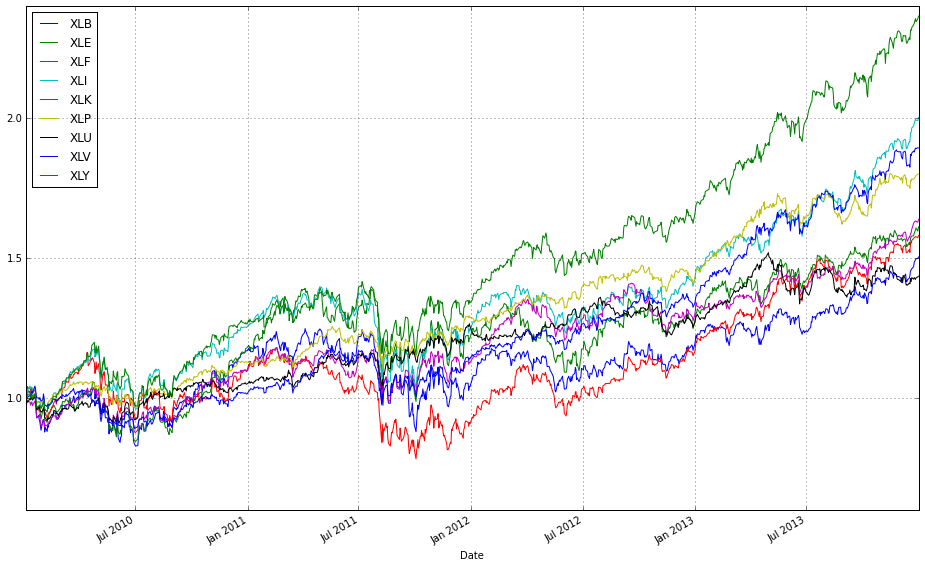

In [ ]:
# plot normalized prices of these stocks
(train_sectors / train_sectors.iloc[0,:]).plot()

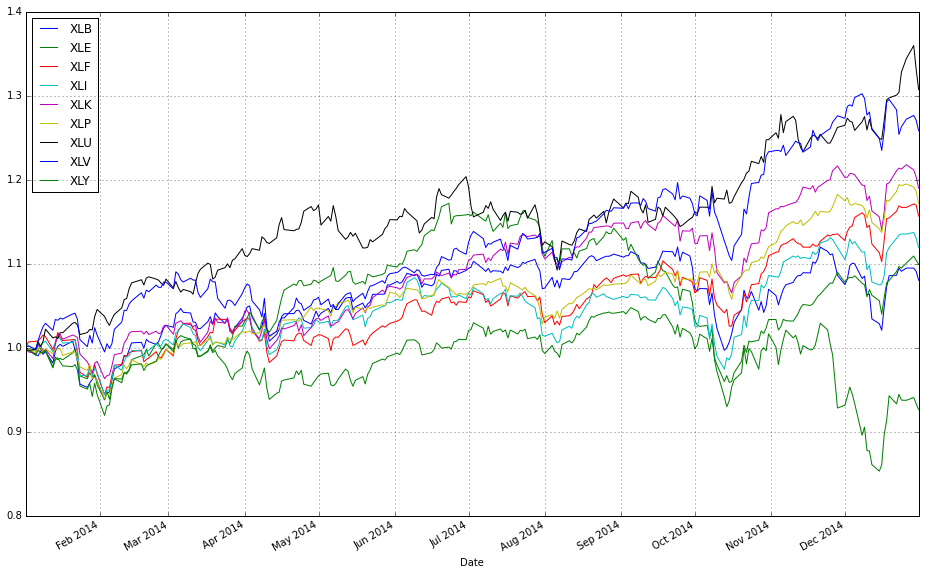

In [ ]:
# plot normalized prices of these stocks
(test_sectors / test_sectors.iloc[0,:]).plot()

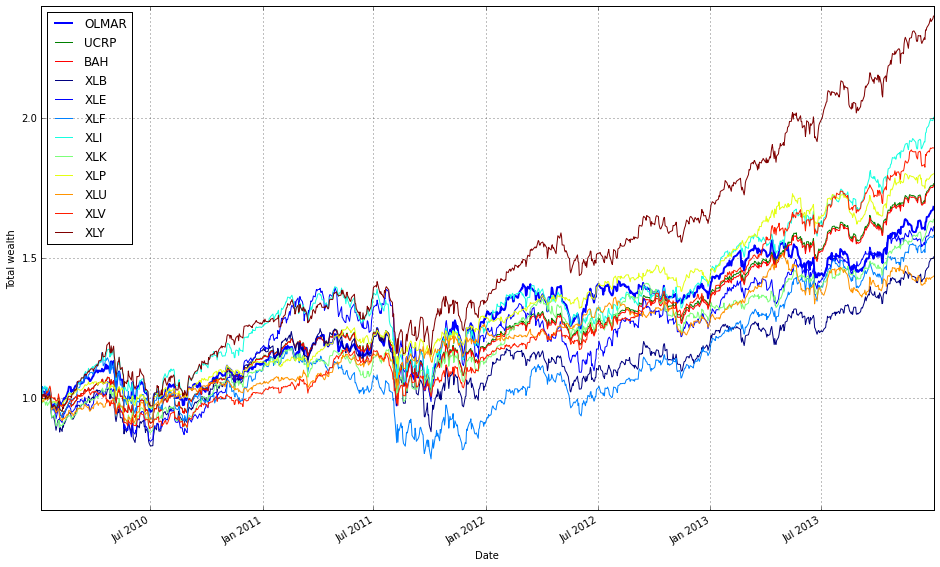

In [ ]:
train_olmar_sectors = algos.OLMAR().run(train_sectors)
train_olmar_sectors.plot(assets=True, weights=False, ucrp=True, bah=True, portfolio_label='OLMAR')

In [ ]:
print(train_olmar_sectors.summary())

Summary:
    Profit factor: 1.12
    Sharpe ratio: 0.64
    Information ratio (wrt UCRP): -0.13
    Annualized return: 13.94%
    Longest drawdown: 173 days
    Winning days: 53.0%
        


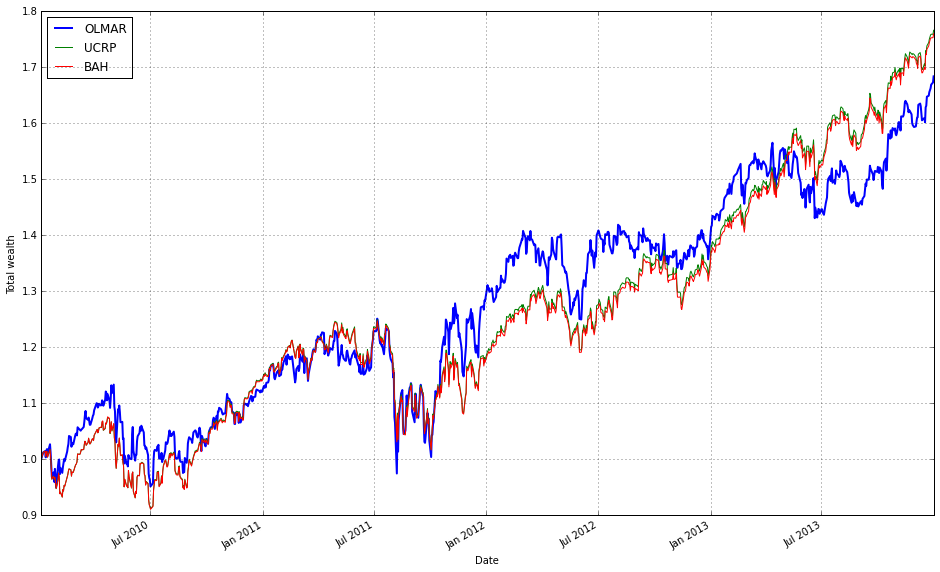

In [ ]:
train_olmar_sectors.plot(assets=False, weights=False, ucrp=True, bah=True, portfolio_label='OLMAR')

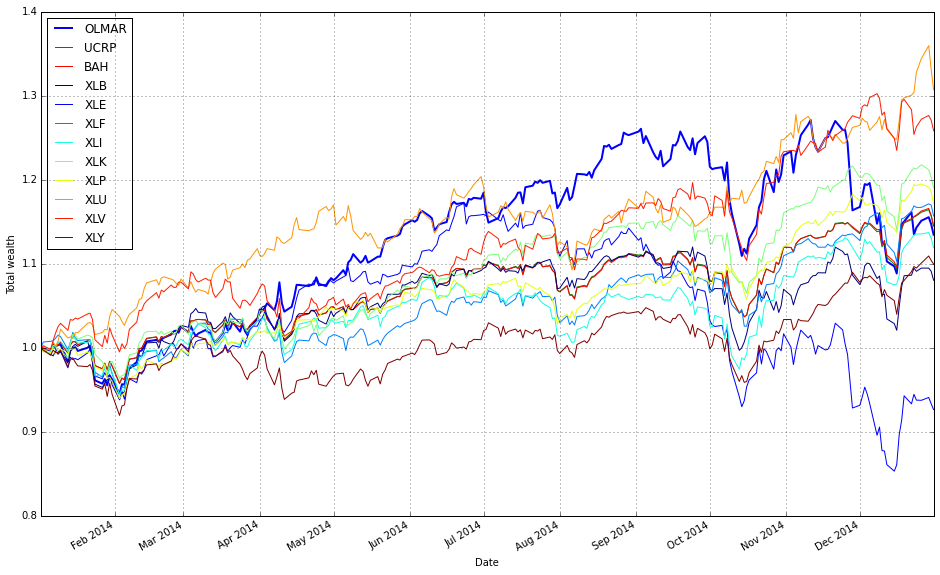

In [ ]:
test_olmar_sectors = algos.OLMAR().run(test_sectors)
test_olmar_sectors.plot(assets=True, weights=False, ucrp=True, bah=True, portfolio_label='OLMAR')

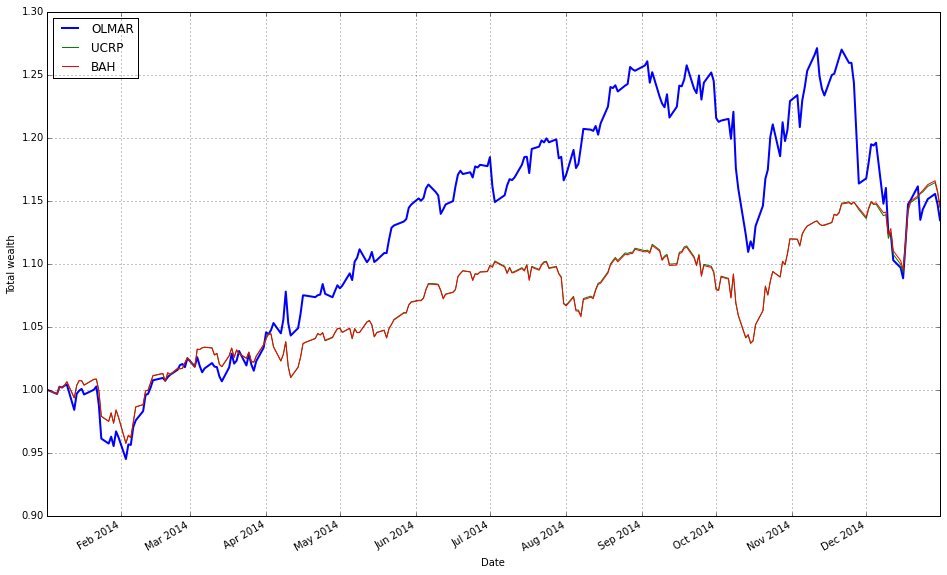

In [ ]:
test_olmar_sectors = algos.OLMAR().run(test_sectors)
test_olmar_sectors.plot(assets=False, weights=False, ucrp=True, bah=True, portfolio_label='OLMAR')

# All OLPS Algos Market Sectors comparison

In [ ]:
#list all the algos
olps_algos_sectors = [
algos.Anticor(),
algos.BAH(),
algos.BCRP(),
algos.BNN(),
algos.CORN(),
algos.CRP(),  # removed weights, and thus equivalent to UCRP
algos.CWMR(),
algos.EG(),
algos.Kelly(),
algos.OLMAR(),
algos.ONS(),
algos.PAMR(),
algos.RMR(),
algos.UP()
]

In [ ]:
olps_sectors_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_sectors_train.algo = olps_algos_sectors

In [ ]:
# run all algos - this takes more than a minute
for name, alg in zip(olps_sectors_train.index, olps_sectors_train.algo):
    olps_sectors_train.ix[name,'results'] = alg.run(train_sectors)

In [ ]:
# we need 14 colors for the plot
n_lines = 14
color_idx = np.linspace(0, 1, n_lines)
mpl.rcParams['axes.color_cycle']=[plt.cm.rainbow(i) for i in color_idx]

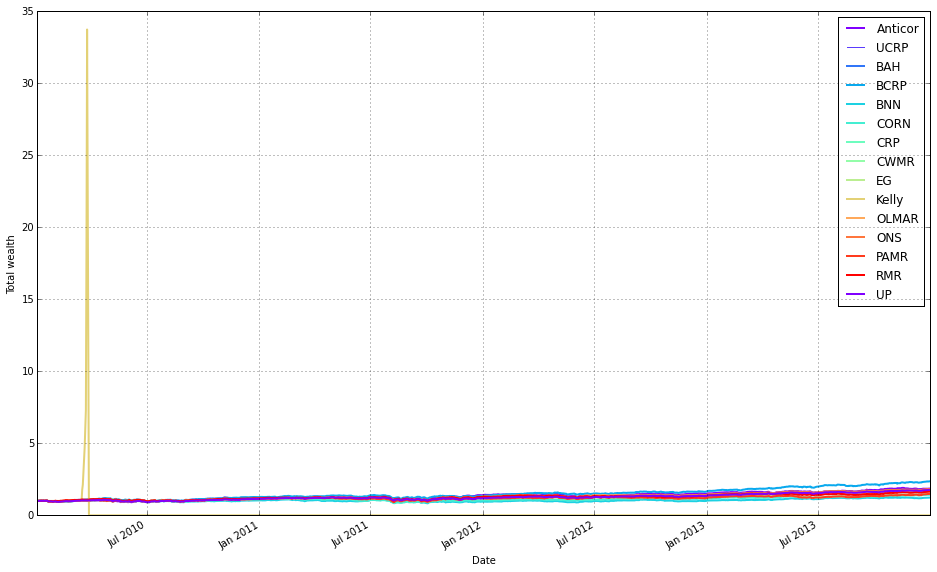

In [ ]:
# plot as if we had no fees
# get the first result so we can grab the figure axes from the plot
olps_df = olps_sectors_train
ax = olps_df.results[0].plot(assets=False, weights=False, ucrp=True, portfolio_label=olps_df.index[0])
for k, r in olps_df.results.iteritems():
    if k == olps_df.results.keys()[0]: # skip the first item because we have it already
        continue
    r.plot(assets=False, weights=False, ucrp=False, portfolio_label=k, ax=ax[0])

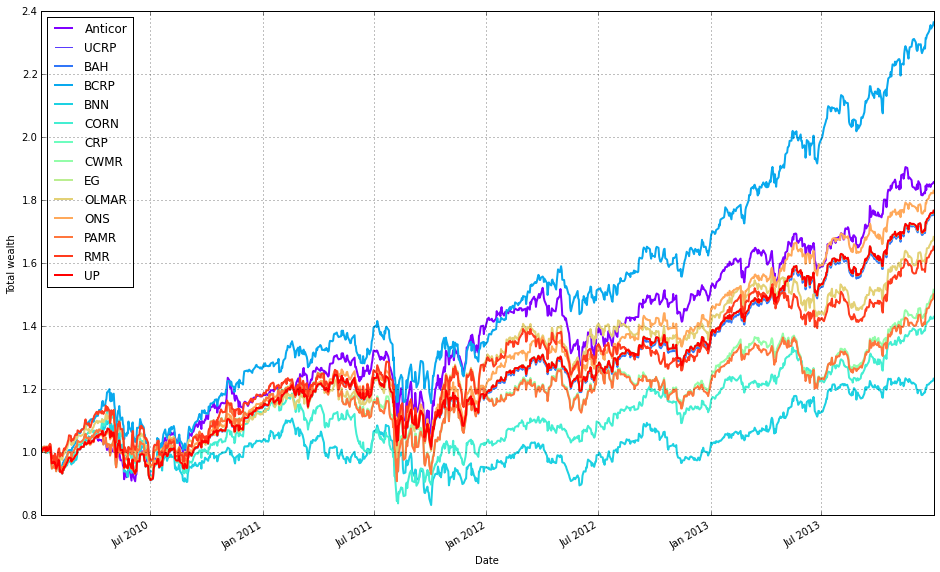

In [ ]:
# Kelly went wild, so let's remove it
# get the first result so we can grab the figure axes from the plot
olps_df = olps_sectors_train
ax = olps_df.results[0].plot(assets=False, weights=False, ucrp=True, portfolio_label=olps_df.index[0])
for k, r in olps_df.results.iteritems():
    if k == olps_df.results.keys()[0] or k == 'Kelly' : # skip the first item because we have it already
        continue
    r.plot(assets=False, weights=False, ucrp=False, portfolio_label=k, ax=ax[0])

In [ ]:
olps_stats(olps_sectors_train)
olps_sectors_train[metrics].sort('profit', ascending=False)

profit     sharpe information annualized_return drawdown_period  \
BCRP     1.226919   1.168603    1.148355          24.06737             134   
ONS      1.170012  0.8586938   0.4181884          16.35309             134   
UP       1.166523  0.8495217   0.3003208          15.33203             145   
CRP      1.166265  0.8482206           0          15.31564             145   
EG       1.166244  0.8481597  -0.3349534          15.30911             145   
BAH      1.166026  0.8479684  -0.2642631          15.21354             145   
Anticor   1.14944  0.7725771   0.1426251          16.78452             178   
OLMAR     1.12479  0.6402547  -0.1256112          13.94468             173   
RMR      1.118902   0.614074  -0.1753967          13.41708             216   
CORN     1.095282  0.5037723  -0.6879739          9.378424             398   
CWMR     1.095178  0.4939886  -0.3888658          10.98823             249   
PAMR     1.092942  0.4832585  -0.4119575          10.72079             252   
BNN      1.050962  0.2778638   -1.042531          5.400526             536   
Kelly           0        NaN           0              -100             948   

        winning_pct  
BCRP         55.667  
ONS         55.8209  
UP         55.32338  
CRP        55.42289  
EG         55.52239  
BAH        55.72139  
Anticor    53.60721  
OLMAR      52.97679  
RMR        53.08392  
CORN        56.0199  
CWMR       53.18504  
PAMR        53.5497  
BNN        52.12121  
Kelly      53.71728

In [ ]:
# create the test set dataframe
olps_sectors_test  = pd.DataFrame(index=algo_names, columns=algo_data)
olps_sectors_test.algo  = olps_algos_sectors

In [ ]:
# run all algos
for name, alg in zip(olps_sectors_test.index, olps_sectors_test.algo):
    olps_sectors_test.ix[name,'results'] = alg.run(test_sectors)

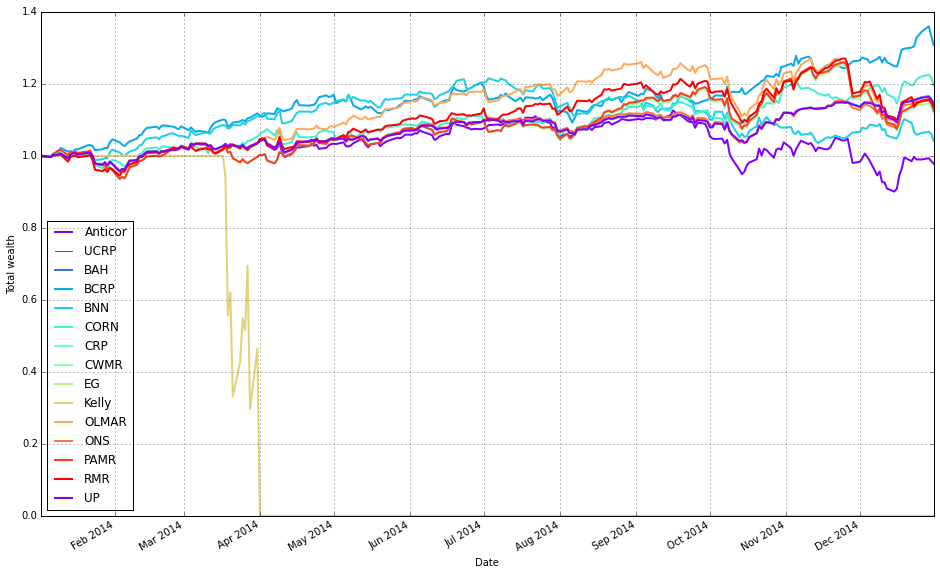

In [ ]:
# plot as if we had no fees
# get the first result so we can grab the figure axes from the plot
olps_df = olps_sectors_test
ax = olps_df.results[0].plot(assets=False, weights=False, ucrp=True, portfolio_label=olps_df.index[0])
for k, r in olps_df.results.iteritems():
    if k == olps_df.results.keys()[0] : #or k == 'Kelly': # skip the first item because we have it already
        continue
    r.plot(assets=False, weights=False, ucrp=False, portfolio_label=k, ax=ax[0])

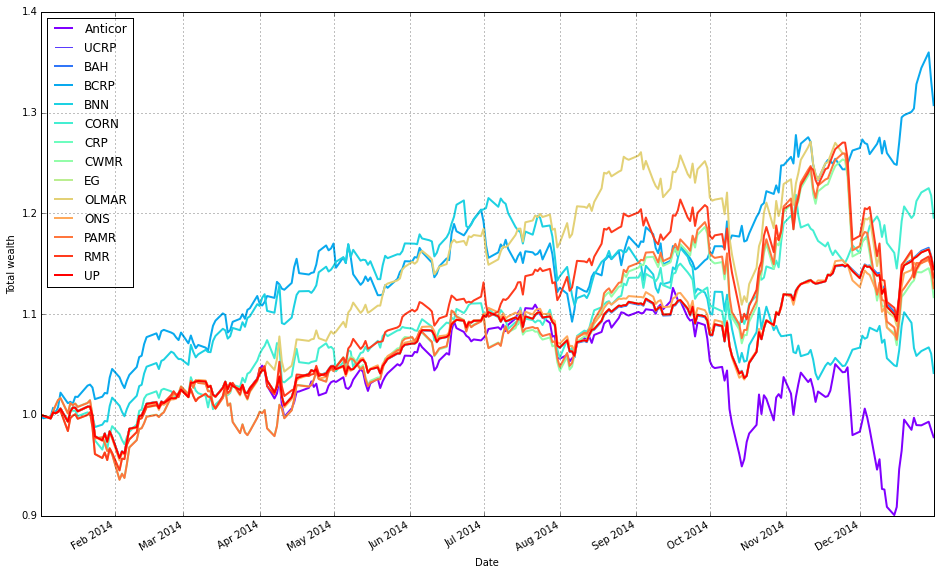

In [ ]:
# drop Kelly !
# get the first result so we can grab the figure axes from the plot
olps_df = olps_sectors_test
ax = olps_df.results[0].plot(assets=False, weights=False, ucrp=True, portfolio_label=olps_df.index[0])
for k, r in olps_df.results.iteritems():
    if k == olps_df.results.keys()[0] or k == 'Kelly': # skip the first item because we have it already
        continue
    r.plot(assets=False, weights=False, ucrp=False, portfolio_label=k, ax=ax[0])

In [ ]:
olps_stats(olps_sectors_test)
olps_sectors_test[metrics].sort('profit', ascending=False)

profit     sharpe information annualized_return drawdown_period  \
BCRP      1.372667   1.999838    1.068856          30.93763              79   
BAH       1.238424   1.255041    0.274977          14.64473              39   
EG        1.235216   1.239731   0.2910832           14.5555              39   
CRP       1.235039   1.238862           0          14.55038              39   
UP        1.234865   1.237929  -0.5728829          14.53445              39   
CORN      1.233172   1.290861   0.4536957          19.69628              35   
ONS       1.208885    1.10624  -0.3155632          13.80497              43   
RMR       1.141392  0.7458201 -0.06157608          13.71809              33   
OLMAR     1.135582  0.7181107 -0.07290339          13.54462              47   
PAMR      1.130602  0.7027512  -0.1423942          12.65033              41   
CWMR      1.121708  0.6561141    -0.20992          11.76061              41   
BNN       1.049022  0.2901784  -0.9299598          4.194964             125   
Anticor  0.9770185 -0.1272582   -1.357038         -2.208917              74   
Kelly            0        NaN           0              -100             251   

        winning_pct  
BCRP       56.45161  
BAH        59.36255  
EG         58.96414  
CRP        58.96414  
UP         58.96414  
CORN       54.58167  
ONS        58.16733  
RMR        59.83936  
OLMAR      60.64257  
PAMR       58.63454  
CWMR       58.23293  
BNN        54.61847  
Anticor    53.38645  
Kelly      53.23383

# Further work

- More algo's could be optimized for parameters before they are run against the test set
- In addition to the BAH, CRP and BCRP benchmarks, we could consider holding [SPY](https://www.google.com/finance?q=SPY) at 100% as a benchmark.
- Could look into BAH(OLMAR) and other combinations as this framework supports combining approaches directly
- Experiment with the ```run_subsets``` feature

# Conclusion

RMR and OLMAR do add value to a Lazy Portfolio if tested or run over a long enough period of time.  This gives RMR and OLMAR a chance to grab onto a period of volatility.  But in an up market (2013-1014) you want to Follow-the-Leader, not Follow-the-Looser.  Of the other algo's, CRP or BAH are decent, and maybe it's worth understanding what ONS is doing.